## Exploratory Data Analysis Telco customer churn

In [2]:
### import necessary data packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [404]:
### read in preliminary data
dftelco = pd.read_csv('Telco_customer_churn.csv')

In [405]:
# make a copy and look at prelim. info
telco_C = dftelco.copy
dftelco.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [406]:
## get basic statistics
dftelco.describe(include='all')

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
count,7043,7043.0,7043,7043,7043,7043.000000,7043,7043.000000,7043.000000,7043,7043,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043,7043.000000,7043.000000,7043.000000,1869
unique,7043,NaN,1,1,1129,NaN,1652,NaN,NaN,2,2,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2,NaN,NaN,NaN,20
top,6283-GITPX,NaN,United States,California,Los Angeles,NaN,"34.1528, -118.000482",NaN,NaN,Male,No,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No,NaN,NaN,NaN,Attitude of support person
freq,1,NaN,7043,7043,305,NaN,5,NaN,NaN,3555,5901,3641,5416,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174,NaN,NaN,NaN,192
mean,NaN,1.0,NaN,NaN,NaN,93521.964646,NaN,36.282441,-119.798880,NaN,NaN,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN,0.265370,58.699418,4400.295755,NaN
std,NaN,0.0,NaN,NaN,NaN,1865.794555,NaN,2.455723,2.157889,NaN,NaN,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN,0.441561,21.525131,1183.057152,NaN
min,NaN,1.0,NaN,NaN,NaN,90001.000000,NaN,32.555828,-124.301372,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN,0.000000,5.000000,2003.000000,NaN
25%,NaN,1.0,NaN,NaN,NaN,92102.000000,NaN,34.030915,-121.815412,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN,0.000000,40.000000,3469.000000,NaN
50%,NaN,1.0,NaN,NaN,NaN,93552.000000,NaN,36.391777,-119.730885,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN,0.000000,61.000000,4527.000000,NaN
75%,NaN,1.0,NaN,NaN,NaN,95351.000000,NaN,38.224869,-118.043237,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN,1.000000,75.000000,5380.500000,NaN


In [3]:
### set option for data frame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
dftelco.head()

#### Initial data fixes
-- Column names have spaces
-- Total Charges should be numeric
-- zip code should be a string

In [408]:
## standarize column names 
dftelco.columns = [col.replace(' ','_') for col in dftelco.columns]


In [409]:
print(dftelco.Total_Charges.unique())

['108.15' '151.65' '820.5' ... '7362.9' '346.45' '6844.5']


In [410]:
dftelco.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip_Code',
       'Lat_Long', 'Latitude', 'Longitude', 'Gender', 'Senior_Citizen',
       'Partner', 'Dependents', 'Tenure_Months', 'Phone_Service',
       'Multiple_Lines', 'Internet_Service', 'Online_Security',
       'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV',
       'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method',
       'Monthly_Charges', 'Total_Charges', 'Churn_Label', 'Churn_Value',
       'Churn_Score', 'CLTV', 'Churn_Reason'],
      dtype='object')

In [411]:
## change "total charges to numeric" 
dftelco['Total_Charges'] = pd.to_numeric(dftelco['Total_Charges'], errors='coerce')

### change zip code to string
dftelco['Zip_Code'] = dftelco['Zip_Code'].astype('str')

In [412]:
## check data types
dftelco.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip_Code              object
Lat_Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
Churn_Label           object
Churn_Value            int64
Churn_Score            int64
CLTV                   int64
Churn_Reason          object
dtype: object

In [413]:
## get basic statistics agan with new dtypes
dftelco.describe(include='all')

,CustomerID,Count,Country,State,City,Zip_Code,Lat_Long,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,Churn_Value,Churn_Score,CLTV,Churn_Reason
count,7043,7043.0,7043,7043,7043,7043,7043,7043.000000,7043.000000,7043,7043,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7032.000000,7043,7043.000000,7043.000000,7043.000000,1869
unique,7043,NaN,1,1,1129,1652,1652,NaN,NaN,2,2,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2,NaN,NaN,NaN,20
top,6283-GITPX,NaN,United States,California,Los Angeles,91702,"34.1528, -118.000482",NaN,NaN,Male,No,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No,NaN,NaN,NaN,Attitude of support person
freq,1,NaN,7043,7043,305,5,5,NaN,NaN,3555,5901,3641,5416,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174,NaN,NaN,NaN,192
mean,NaN,1.0,NaN,NaN,NaN,NaN,NaN,36.282441,-119.798880,NaN,NaN,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2283.300441,NaN,0.265370,58.699418,4400.295755,NaN
std,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.455723,2.157889,NaN,NaN,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.771362,NaN,0.441561,21.525131,1183.057152,NaN
min,NaN,1.0,NaN,NaN,NaN,NaN,NaN,32.555828,-124.301372,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN,0.000000,5.000000,2003.000000,NaN
25%,NaN,1.0,NaN,NaN,NaN,NaN,NaN,34.030915,-121.815412,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,401.450000,NaN,0.000000,40.000000,3469.000000,NaN
50%,NaN,1.0,NaN,NaN,NaN,NaN,NaN,36.391777,-119.730885,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN,0.000000,61.000000,4527.000000,NaN
75%,NaN,1.0,NaN,NaN,NaN,NaN,NaN,38.224869,-118.043237,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3794.737500,NaN,1.000000,75.000000,5380.500000,NaN


## Visual Data Analysis

In [414]:
# Using EDA code and function from project 1
# function to look at histogram and boxplot together for numeric features
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(feature.mean(), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(feature.median(), color='black', linestyle='-') # Add median to the histogram

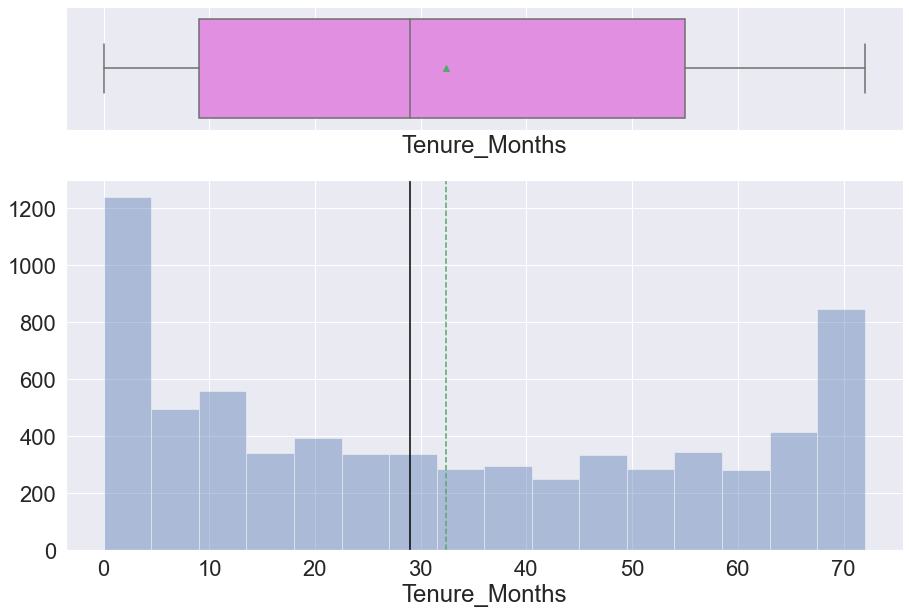

In [415]:
histogram_boxplot(dftelco['Tenure_Months'])

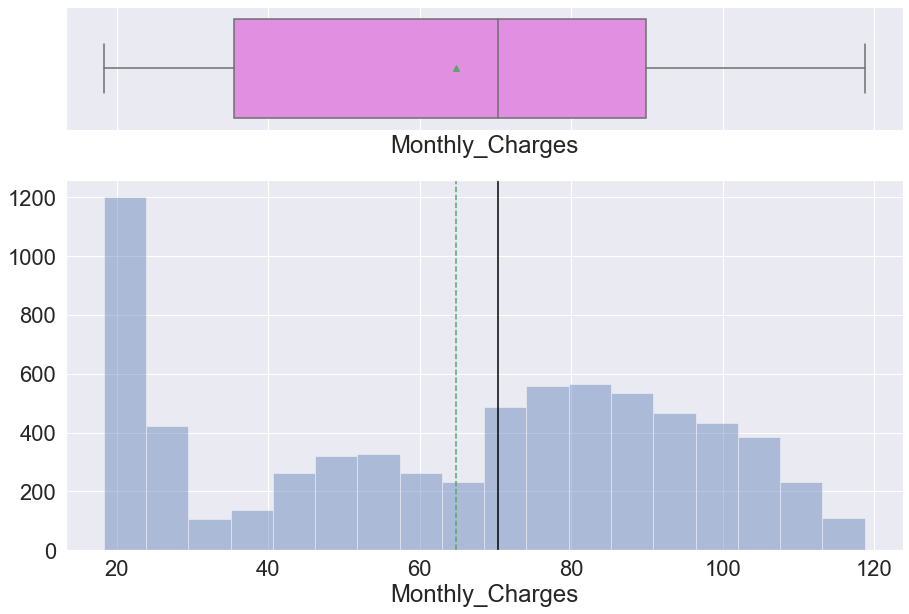

In [416]:
histogram_boxplot(dftelco['Monthly_Charges'])

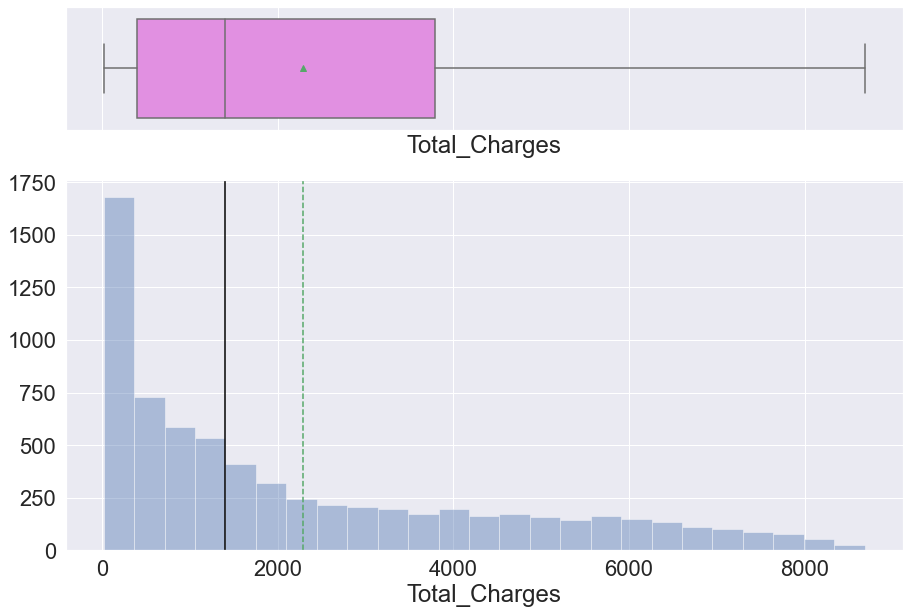

In [417]:
histogram_boxplot(dftelco['Total_Charges'])

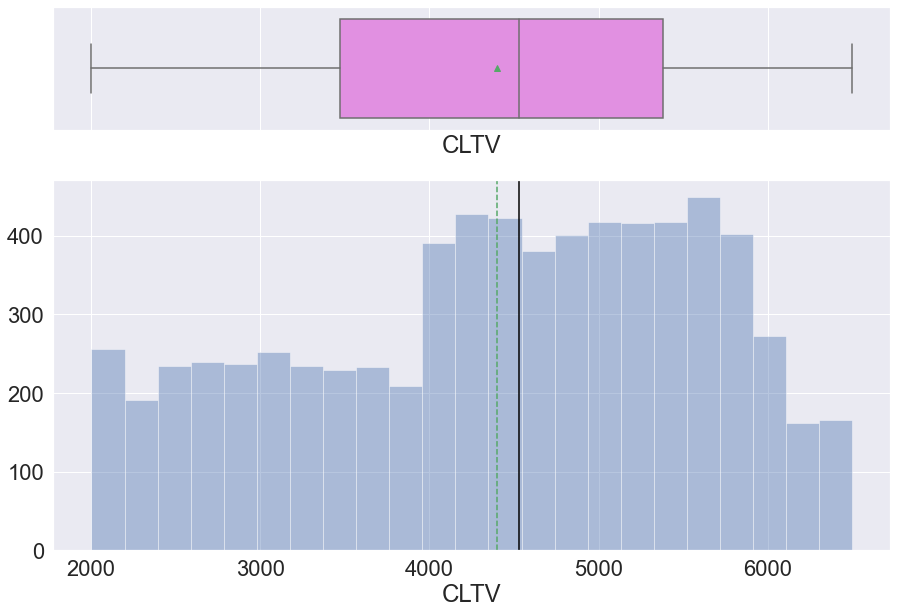

In [418]:
histogram_boxplot(dftelco['CLTV'])

### Look at same numeric variable using churn as hue

<AxesSubplot:xlabel='Tenure_Months', ylabel='Churn_Label'>

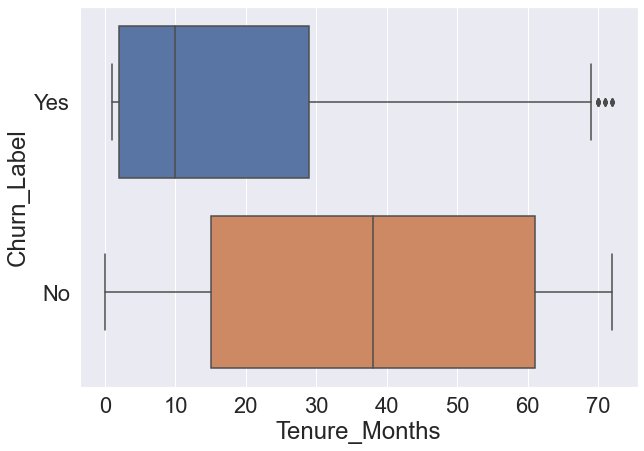

In [419]:
sns.boxplot(x= dftelco['Tenure_Months'], y = dftelco['Churn_Label'])

<AxesSubplot:xlabel='Monthly_Charges', ylabel='Churn_Label'>

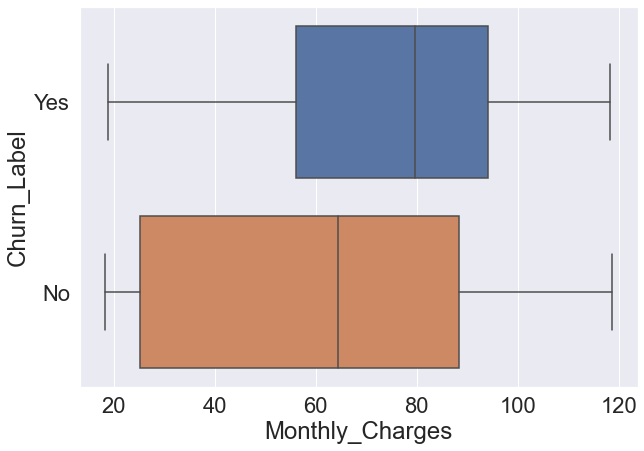

In [420]:
sns.boxplot(x= dftelco['Monthly_Charges'], y = dftelco['Churn_Label'])

<AxesSubplot:xlabel='Total_Charges', ylabel='Churn_Label'>

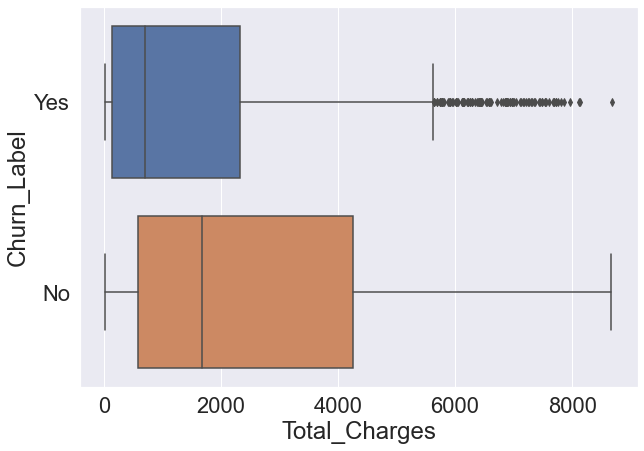

In [421]:
sns.boxplot(x= dftelco['Total_Charges'], y = dftelco['Churn_Label'])

<AxesSubplot:xlabel='CLTV', ylabel='Churn_Label'>

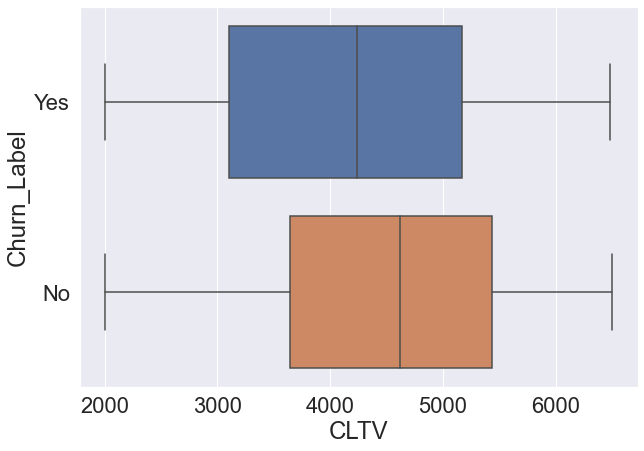

In [422]:
sns.boxplot(x= dftelco['CLTV'], y = dftelco['Churn_Label'])

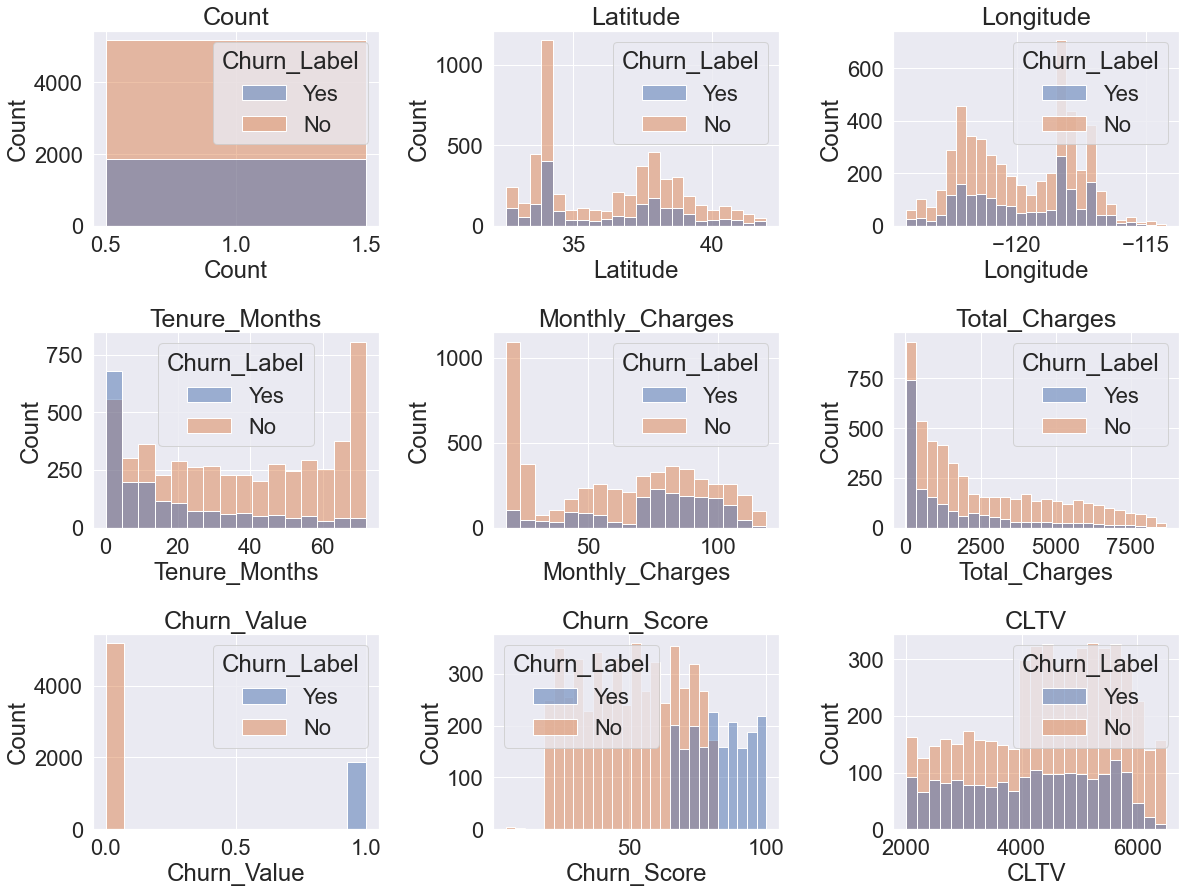

In [423]:
# plot histogram of numeric
from scipy.stats import norm
all_col = dftelco.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,75))

for i in range(len(all_col)):
    plt.subplot(18,3,i+1)
    sns.histplot(x= dftelco[all_col[i]], hue = dftelco['Churn_Label'])
    plt.tight_layout()
    plt.title(all_col[i],fontsize=20)
    

plt.show()

### code from stackoverflow the avline made graphs unreadable so removed, made fig size bigger, tight layout needed
### https://stackoverflow.com/questions/66199693/plot-histogram-of-all-numerical-columns-in-pandas-with-mean-avxline-using-tight

In [424]:
## create a list of categorical column names
cat_col = dftelco.select_dtypes(include=object).columns.tolist()
cat_col

['CustomerID',
 'Country',
 'State',
 'City',
 'Zip_Code',
 'Lat_Long',
 'Gender',
 'Senior_Citizen',
 'Partner',
 'Dependents',
 'Phone_Service',
 'Multiple_Lines',
 'Internet_Service',
 'Online_Security',
 'Online_Backup',
 'Device_Protection',
 'Tech_Support',
 'Streaming_TV',
 'Streaming_Movies',
 'Contract',
 'Paperless_Billing',
 'Payment_Method',
 'Churn_Label',
 'Churn_Reason']

In [425]:
## filter columns to ones only with less than 15 unique values
cat_col = cat_col[1:4] + cat_col[6:]
cat_col

['Country',
 'State',
 'City',
 'Gender',
 'Senior_Citizen',
 'Partner',
 'Dependents',
 'Phone_Service',
 'Multiple_Lines',
 'Internet_Service',
 'Online_Security',
 'Online_Backup',
 'Device_Protection',
 'Tech_Support',
 'Streaming_TV',
 'Streaming_Movies',
 'Contract',
 'Paperless_Billing',
 'Payment_Method',
 'Churn_Label',
 'Churn_Reason']

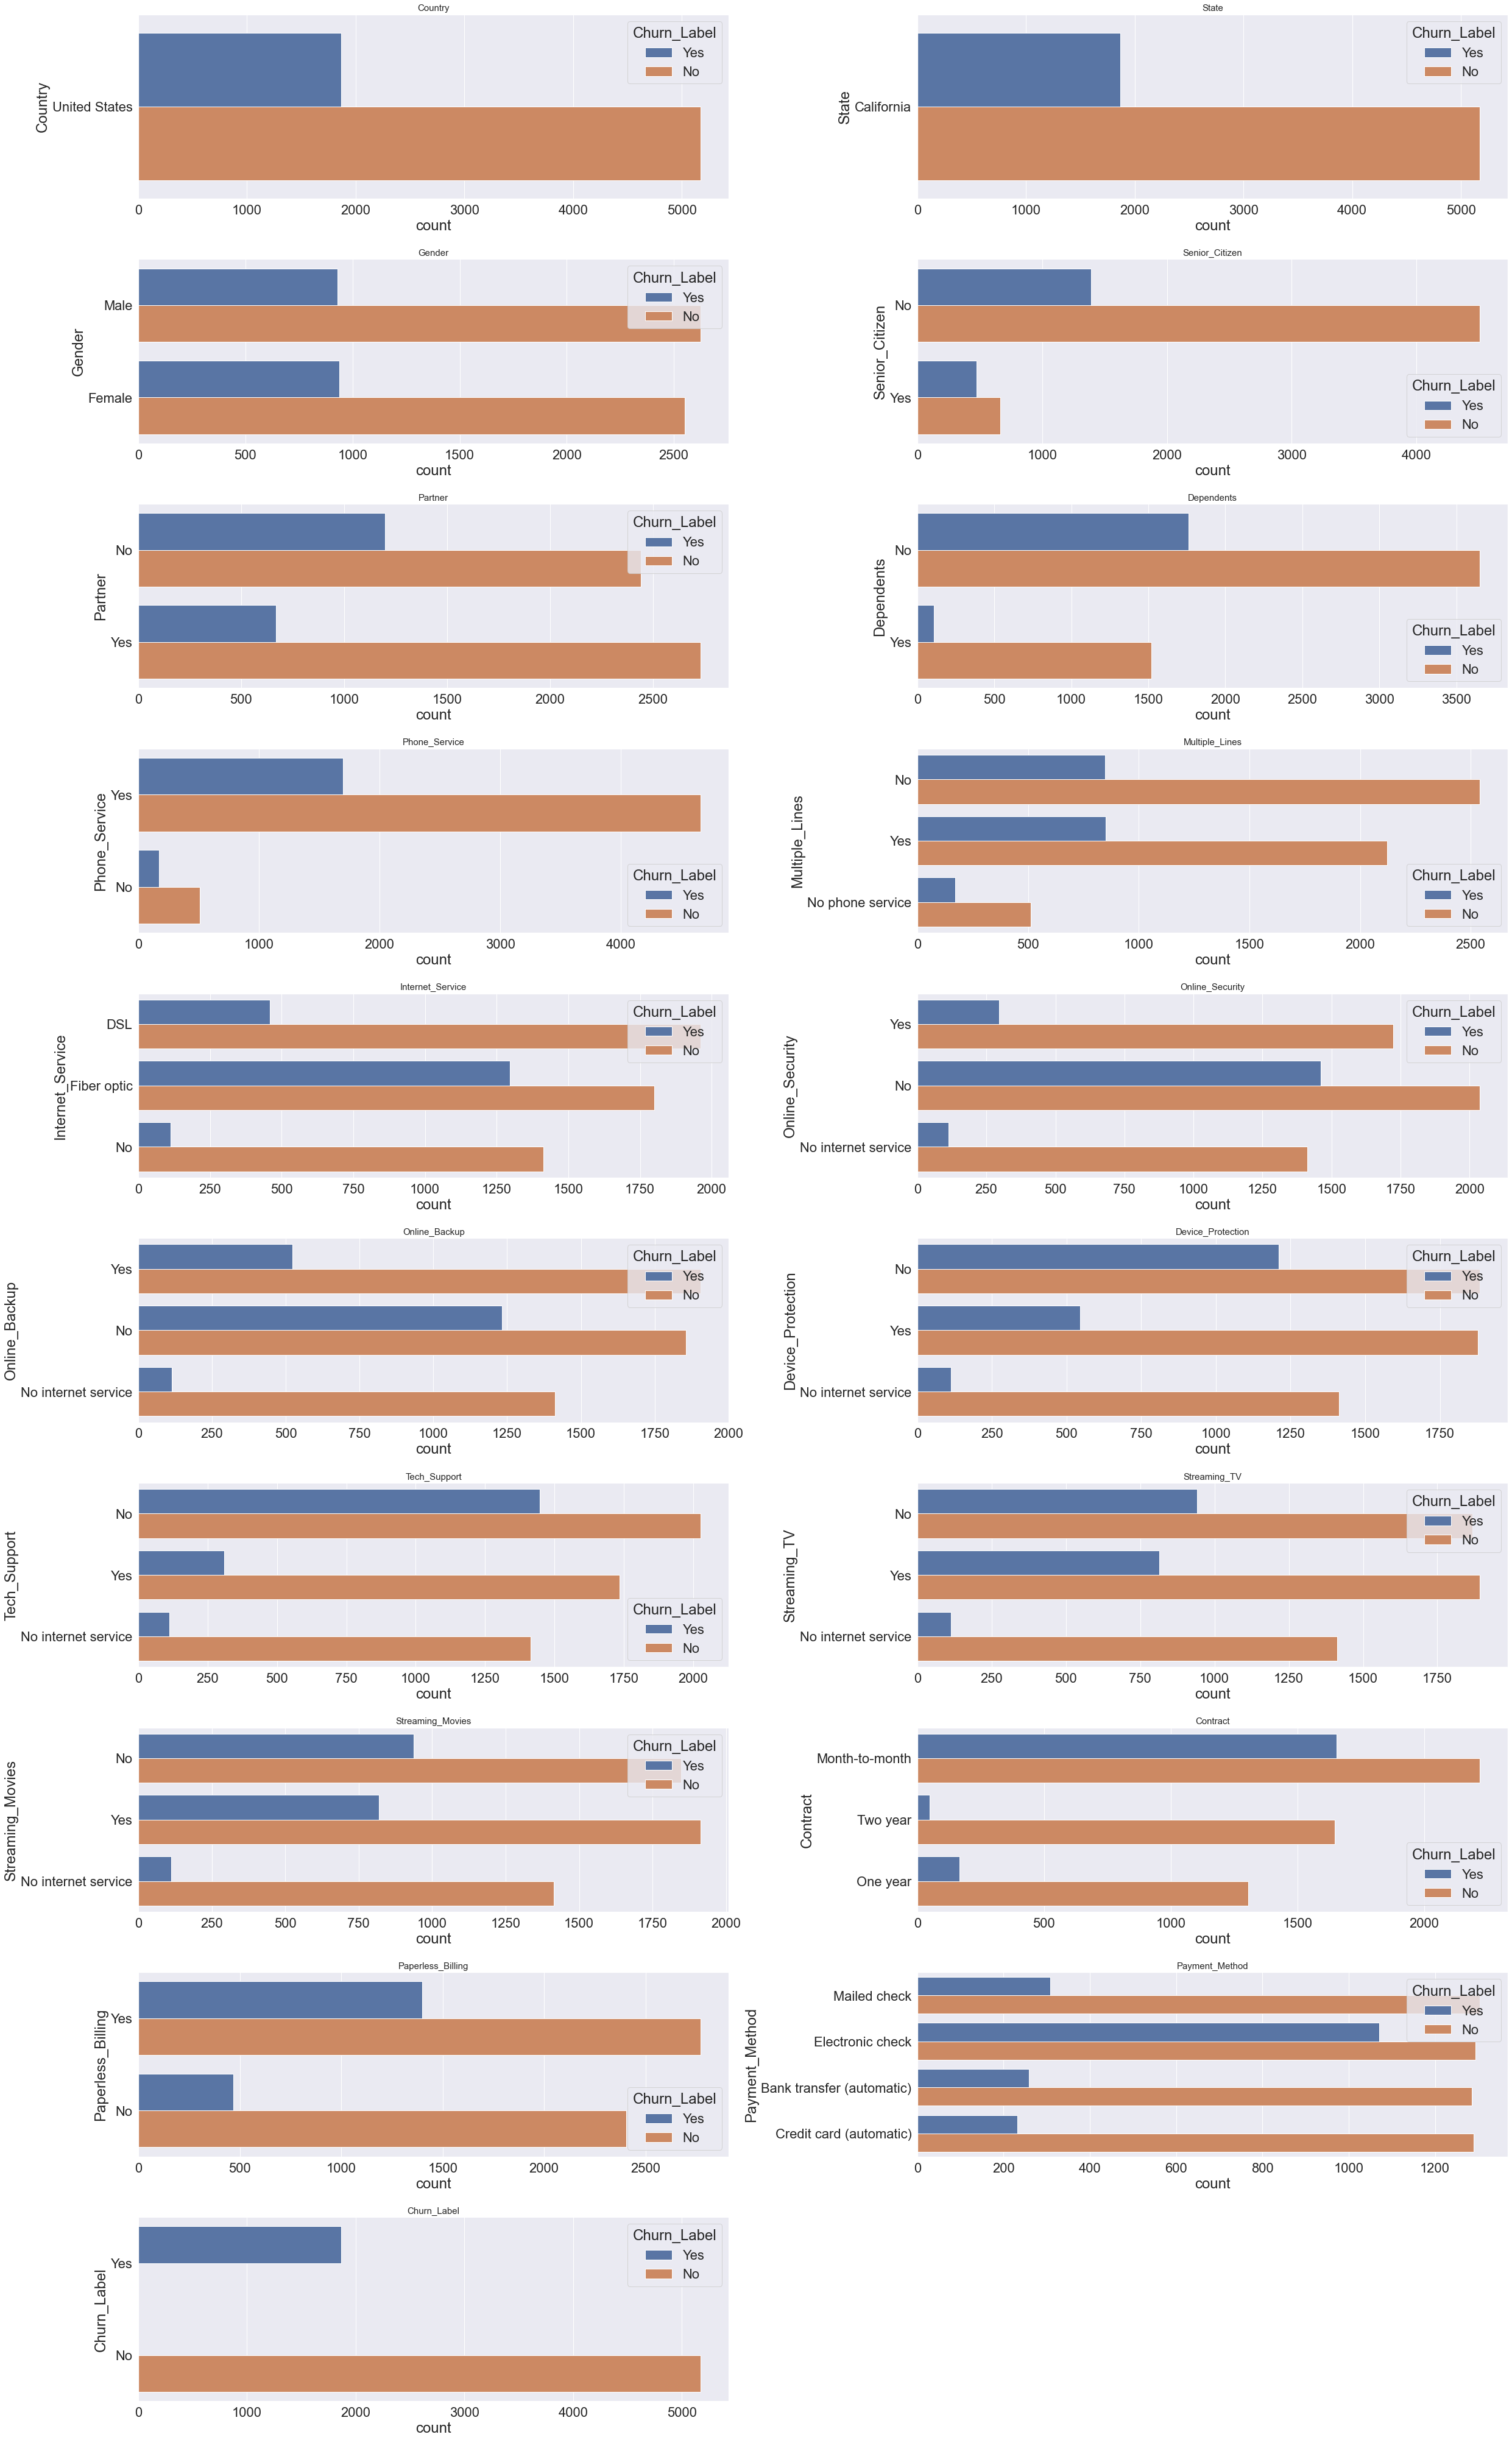

In [426]:
# plot countplots of categorical variables
from scipy.stats import norm
cat_col = dftelco.select_dtypes(include=object).columns.tolist()
cat_col = cat_col[1:3] + cat_col[6:23]
plt.figure(figsize=(35,100))

for i in range(len(cat_col)):
    plt.subplot(18,2,i+1)
    
    sns.countplot(data=dftelco, y=dftelco[cat_col[i]], hue = dftelco['Churn_Label'])   
   
    plt.tight_layout()
    plt.title(cat_col[i],fontsize=15)
    

plt.show()

### altered code for numeric variable above, need landscape orientation in fig size and smaller font to make readable

In [427]:
### list of churn reason - consider merging for future versions
churn_reason = dftelco.Churn_Reason.unique()
churn_reason

array(['Competitor made better offer', 'Moved',
       'Competitor had better devices',
       'Competitor offered higher download speeds',
       'Competitor offered more data', 'Price too high',
       'Product dissatisfaction', 'Service dissatisfaction',
       'Lack of self-service on Website', 'Network reliability',
       'Limited range of services',
       'Lack of affordable download/upload speed',
       'Long distance charges', 'Extra data charges', "Don't know",
       'Poor expertise of online support',
       'Poor expertise of phone support', 'Attitude of service provider',
       'Attitude of support person', 'Deceased', nan], dtype=object)

In [428]:
#### condense churn reasons
dftelco['Churn_Reason'] = dftelco['Churn_Reason'].replace(['Competitor made better offer'],'Competitor')
dftelco['Churn_Reason'] = dftelco['Churn_Reason'].replace(['Competitor had better devices'],'Competitor')
dftelco['Churn_Reason'] = dftelco['Churn_Reason'].replace(['Competitor offered higher download speeds'],'Competitor')
dftelco['Churn_Reason'] = dftelco['Churn_Reason'].replace(['Competitor offered more data'],'Competitor')
dftelco['Churn_Reason'] = dftelco['Churn_Reason'].replace(['Price too high'],'Cost')
dftelco['Churn_Reason'] = dftelco['Churn_Reason'].replace(['Lack of affordable download/upload speed'],'Cost')
dftelco['Churn_Reason'] = dftelco['Churn_Reason'].replace(['Long distance charges'],'Cost')
dftelco['Churn_Reason'] = dftelco['Churn_Reason'].replace(['Extra data charges'],'Cost')
dftelco['Churn_Reason'] = dftelco['Churn_Reason'].replace(['Service dissatisfaction'],'Product dissatisfaction')
dftelco['Churn_Reason'] = dftelco['Churn_Reason'].replace(['Lack of self-service on Website'],'Product dissatisfaction')
dftelco['Churn_Reason'] = dftelco['Churn_Reason'].replace(['Network reliability'],'Product dissatisfaction')
dftelco['Churn_Reason'] = dftelco['Churn_Reason'].replace(['Limited range of services'],'Product dissatisfaction')
dftelco['Churn_Reason'] = dftelco['Churn_Reason'].replace(['Poor expertise of phone support'],'Poor support services')
dftelco['Churn_Reason'] = dftelco['Churn_Reason'].replace(['Poor expertise of online support'],'Poor support services')
dftelco['Churn_Reason'] = dftelco['Churn_Reason'].replace(['Attitude of service provider'],'Poor support services')
dftelco['Churn_Reason'] = dftelco['Churn_Reason'].replace(['Attitude of support person'],'Poor support services')
dftelco['Churn_Reason'] = dftelco['Churn_Reason'].replace(['Deceased'],'Other')
dftelco['Churn_Reason'] = dftelco['Churn_Reason'].replace(["Don't know"],'Other')
dftelco['Churn_Reason'] = dftelco['Churn_Reason'].replace(['Moved'],'Other')

In [429]:
### drop location and churn fields that won't be used in base maodel
dftelco_base = dftelco.drop(['Churn_Label', 'Churn_Score','CustomerID','Count','Churn_Reason','Zip_Code','Lat_Long','City', 'Country','State','Latitude', 'Longitude'], axis=1)
dftelco_base.head()

,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value,CLTV
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,3239
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,2701
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,5372
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,5003
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,5340


In [430]:
dftelco_base.columns

Index(['Gender', 'Senior_Citizen', 'Partner', 'Dependents', 'Tenure_Months',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service',
       'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support',
       'Streaming_TV', 'Streaming_Movies', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charges', 'Total_Charges', 'Churn_Value',
       'CLTV'],
      dtype='object')

In [431]:
# find na values
dftelco_base.isna().sum()

Gender                0
Senior_Citizen        0
Partner               0
Dependents            0
Tenure_Months         0
Phone_Service         0
Multiple_Lines        0
Internet_Service      0
Online_Security       0
Online_Backup         0
Device_Protection     0
Tech_Support          0
Streaming_TV          0
Streaming_Movies      0
Contract              0
Paperless_Billing     0
Payment_Method        0
Monthly_Charges       0
Total_Charges        11
Churn_Value           0
CLTV                  0
dtype: int64

In [432]:
### fill na with mean
dftelco_base['Total_Charges'].fillna(int(dftelco_base['Total_Charges'].mean()), inplace=True)

In [433]:
#Create dummies for model
base = pd.get_dummies(data=dftelco_base, columns=['Gender', 'Senior_Citizen', 'Partner', 'Dependents', 'Phone_Service', 'Multiple_Lines', 'Internet_Service',
       'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support',
       'Streaming_TV', 'Streaming_Movies', 'Contract', 'Paperless_Billing',
       'Payment_Method'], drop_first=True)

In [434]:
base.columns

Index(['Tenure_Months', 'Monthly_Charges', 'Total_Charges', 'Churn_Value',
       'CLTV', 'Gender_Male', 'Senior_Citizen_Yes', 'Partner_Yes',
       'Dependents_Yes', 'Phone_Service_Yes',
       'Multiple_Lines_No phone service', 'Multiple_Lines_Yes',
       'Internet_Service_Fiber optic', 'Internet_Service_No',
       'Online_Security_No internet service', 'Online_Security_Yes',
       'Online_Backup_No internet service', 'Online_Backup_Yes',
       'Device_Protection_No internet service', 'Device_Protection_Yes',
       'Tech_Support_No internet service', 'Tech_Support_Yes',
       'Streaming_TV_No internet service', 'Streaming_TV_Yes',
       'Streaming_Movies_No internet service', 'Streaming_Movies_Yes',
       'Contract_One year', 'Contract_Two year', 'Paperless_Billing_Yes',
       'Payment_Method_Credit card (automatic)',
       'Payment_Method_Electronic check', 'Payment_Method_Mailed check'],
      dtype='object')

In [435]:
## final base data
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Tenure_Months                           7043 non-null   int64  
 1   Monthly_Charges                         7043 non-null   float64
 2   Total_Charges                           7043 non-null   float64
 3   Churn_Value                             7043 non-null   int64  
 4   CLTV                                    7043 non-null   int64  
 5   Gender_Male                             7043 non-null   uint8  
 6   Senior_Citizen_Yes                      7043 non-null   uint8  
 7   Partner_Yes                             7043 non-null   uint8  
 8   Dependents_Yes                          7043 non-null   uint8  
 9   Phone_Service_Yes                       7043 non-null   uint8  
 10  Multiple_Lines_No phone service         7043 non-null   uint

In [436]:
### create train test split
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

X = base.drop(['Churn_Value'], axis=1)
y = base['Churn_Value']
X, y = shuffle(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)

In [437]:
### data check
X.columns

Index(['Tenure_Months', 'Monthly_Charges', 'Total_Charges', 'CLTV',
       'Gender_Male', 'Senior_Citizen_Yes', 'Partner_Yes', 'Dependents_Yes',
       'Phone_Service_Yes', 'Multiple_Lines_No phone service',
       'Multiple_Lines_Yes', 'Internet_Service_Fiber optic',
       'Internet_Service_No', 'Online_Security_No internet service',
       'Online_Security_Yes', 'Online_Backup_No internet service',
       'Online_Backup_Yes', 'Device_Protection_No internet service',
       'Device_Protection_Yes', 'Tech_Support_No internet service',
       'Tech_Support_Yes', 'Streaming_TV_No internet service',
       'Streaming_TV_Yes', 'Streaming_Movies_No internet service',
       'Streaming_Movies_Yes', 'Contract_One year', 'Contract_Two year',
       'Paperless_Billing_Yes', 'Payment_Method_Credit card (automatic)',
       'Payment_Method_Electronic check', 'Payment_Method_Mailed check'],
      dtype='object')

### Base model comparison using all features

In [438]:
from sklearn.linear_model import LogisticRegression
###from sklearn.metrics import log_loss - not using anymore - keep in case
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)
y_prob_pred_test = logreg.predict_proba(X_test)
print(f1_score(y_test, y_pred_lr, average="macro"))



0.7293298372387942


In [439]:
from sklearn.metrics import classification_report
classify_logreg = classification_report(y_test, y_pred_lr)
print(classify_logreg)

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1056
           1       0.64      0.54      0.58       353

    accuracy                           0.81      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [440]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred_dt = classifier.predict(X_test)
print(f1_score(y_test, y_pred_dt, average="macro"))

0.6770516800261948


In [441]:
from sklearn.metrics import classification_report
classify_dt = classification_report(y_test, y_pred_dt)
print(classify_dt)

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1056
           1       0.50      0.56      0.53       353

    accuracy                           0.75      1409
   macro avg       0.67      0.69      0.68      1409
weighted avg       0.76      0.75      0.75      1409



In [442]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
RFclassifier = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 0)
RFclassifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred_rf= classifier.predict(X_test)
print(f1_score(y_test, y_pred_rf, average="macro"))

0.6770516800261948


In [443]:
from sklearn.metrics import classification_report
classify_rf = classification_report(y_test, y_pred_rf)
print(classify_rf)

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1056
           1       0.50      0.56      0.53       353

    accuracy                           0.75      1409
   macro avg       0.67      0.69      0.68      1409
weighted avg       0.76      0.75      0.75      1409



<BarContainer object of 10 artists>

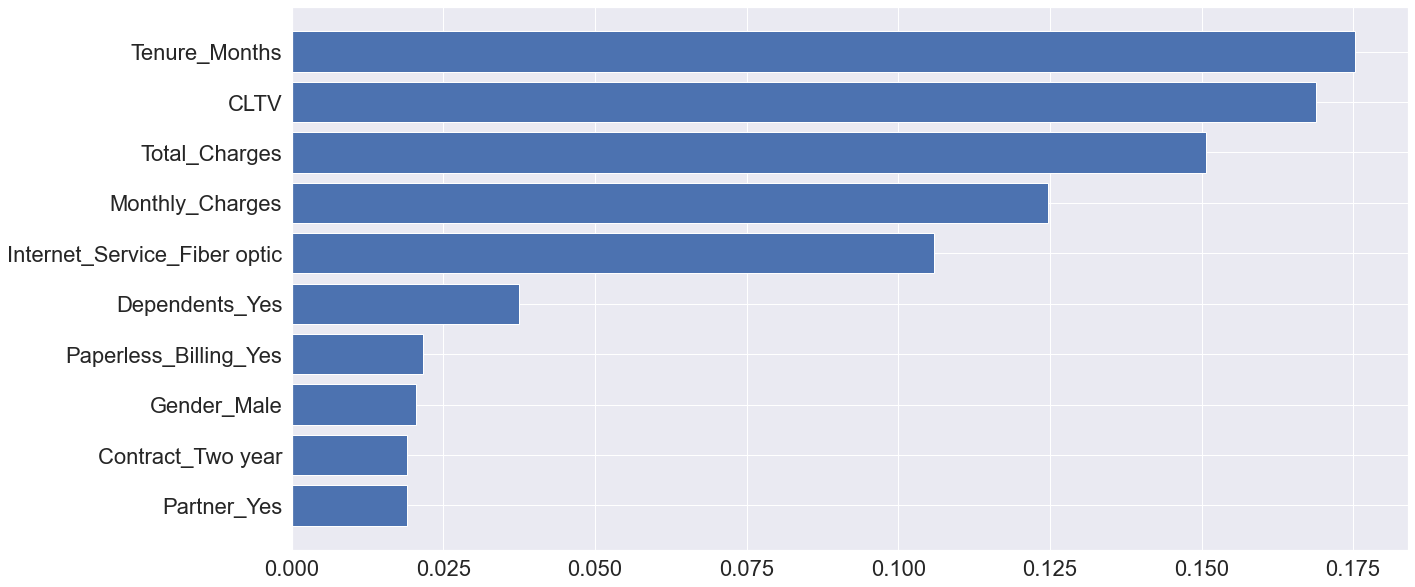

In [444]:
plt.figure(figsize=(20,10))
sorted_idx=classifier.feature_importances_.argsort()[-10:]
plt.barh(X.columns[sorted_idx], classifier.feature_importances_[sorted_idx])

### modified code from blog on feature importance and sorting
### https://mljar.com/blog/feature-importance-in-random-forest/
### only wanted top 10 

AxesSubplot(0.125,0.125;0.775x0.755)


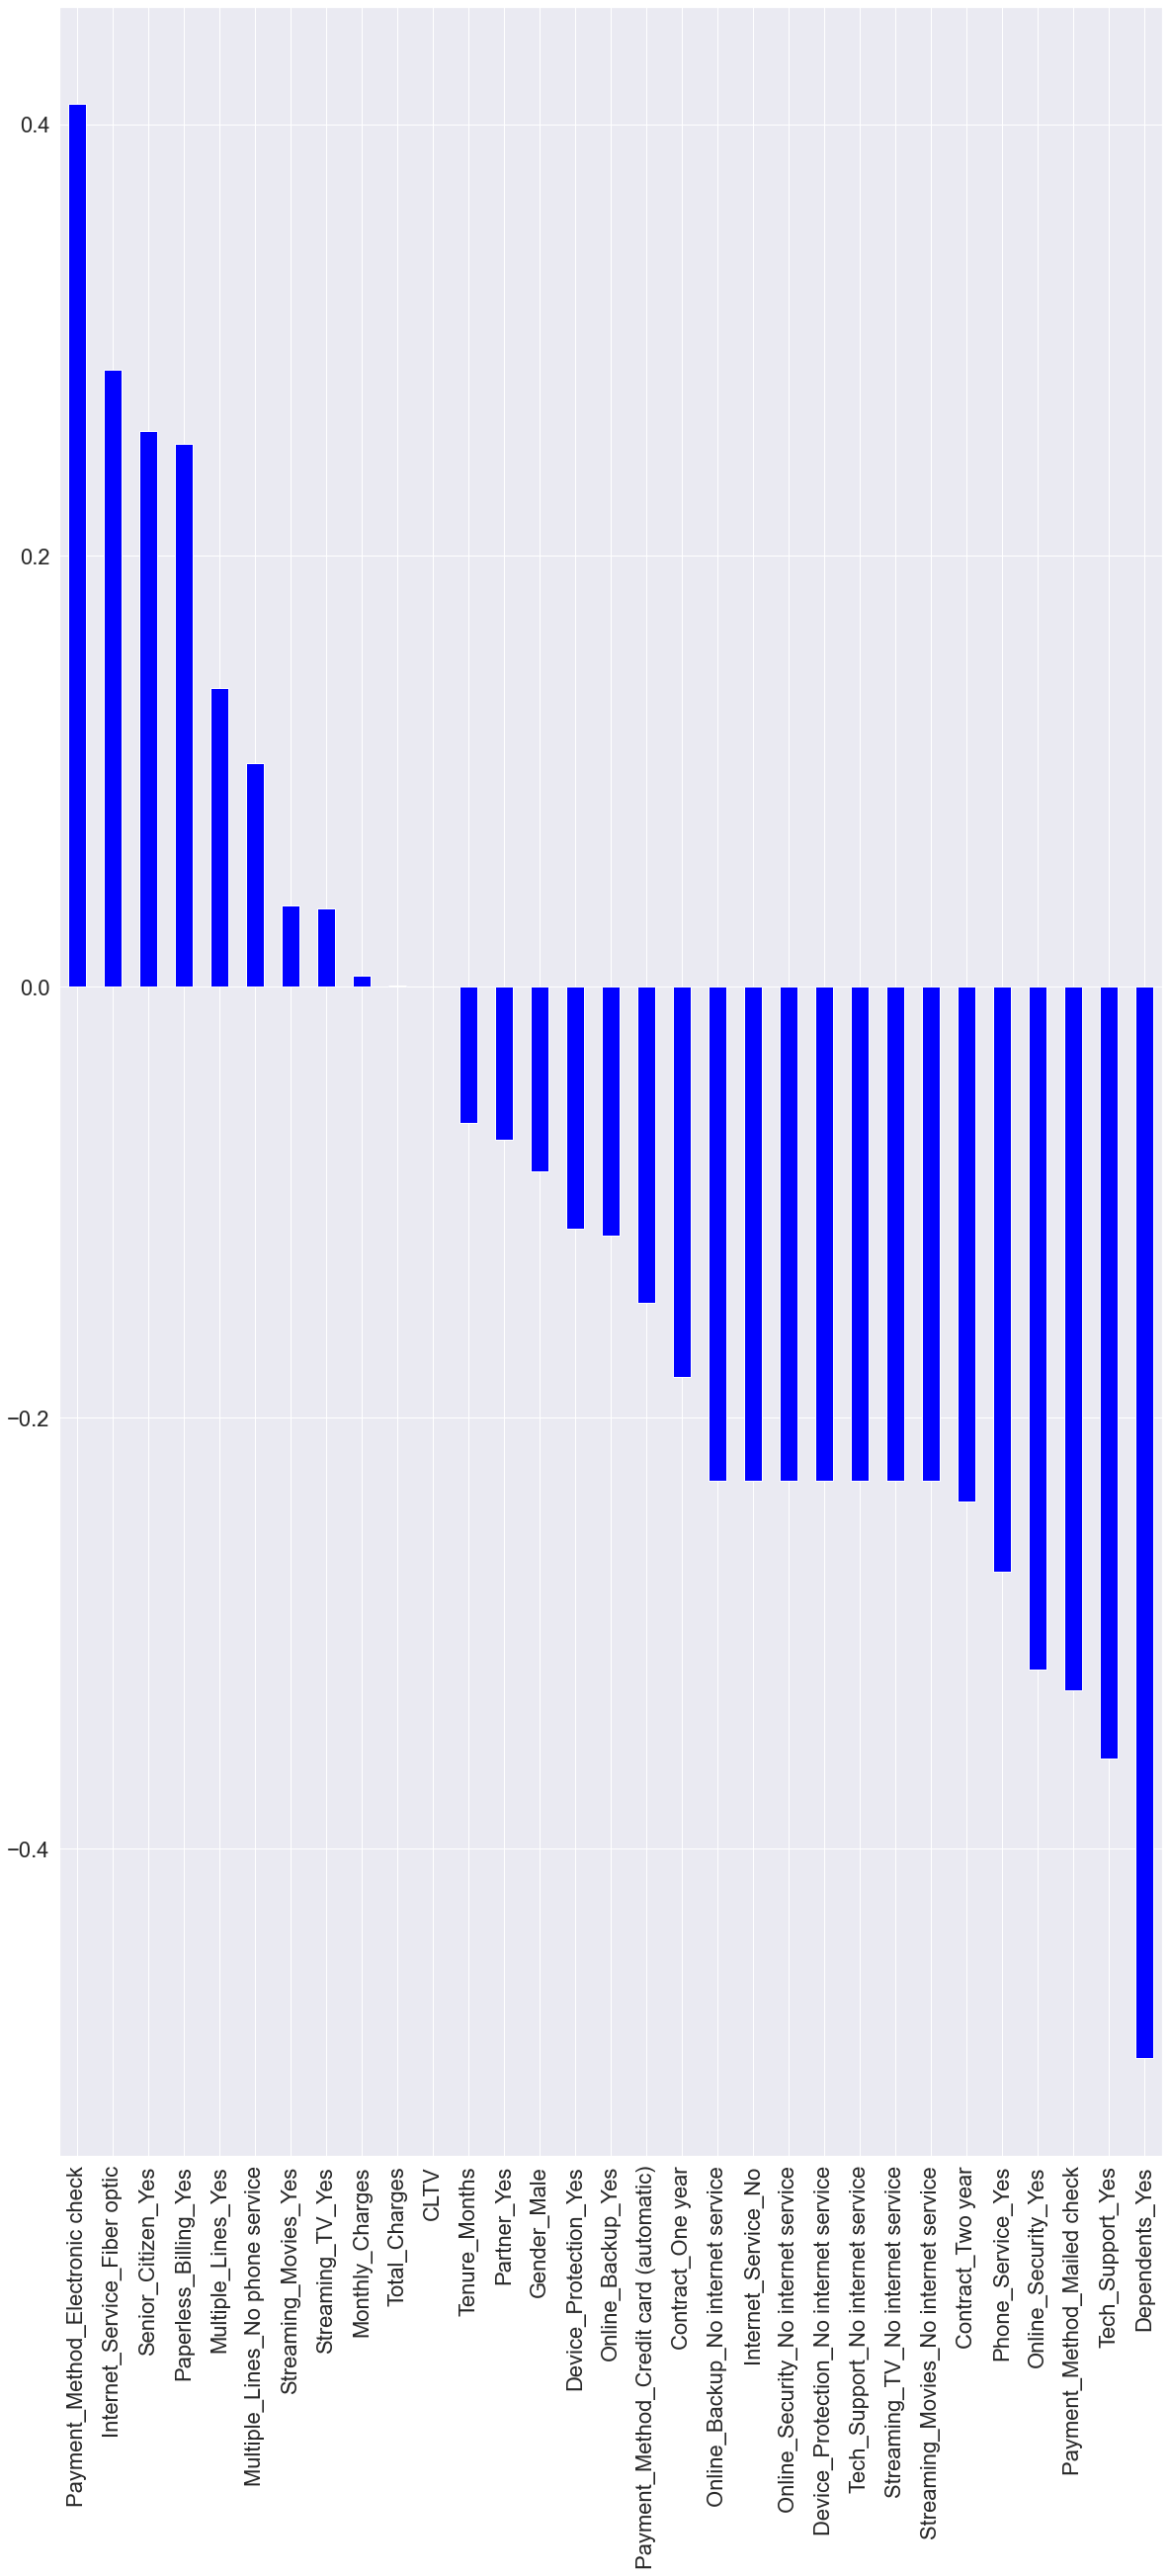

In [446]:
# Weights of the variables
plt.figure(figsize=(20,40))
logweights = pd.Series(logreg.coef_[0], index=X.columns.values)
weight_logreg = logweights.sort_values(ascending = False)[:25].plot(kind='bar', color='blue')
print (weight_logreg)

### code from stackoverflow https://stackoverflow.com/questions/26951880/scikit-learn-linear-regression-how-to-get-coefficients-respective-features
### added sort and plot

In [447]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
GBclassifier = GaussianNB()
GBclassifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred_nb= GBclassifier.predict(X_test)
print(f1_score(y_test, y_pred_nb, average="macro"))

0.6803389160098099


In [448]:
from sklearn.metrics import classification_report
classify_nb = classification_report(y_test, y_pred_nb)
print(classify_nb)

              precision    recall  f1-score   support

           0       0.95      0.64      0.76      1056
           1       0.45      0.89      0.60       353

    accuracy                           0.70      1409
   macro avg       0.70      0.76      0.68      1409
weighted avg       0.82      0.70      0.72      1409



# Models with kfold cross validation


In [449]:
### create train test split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
X, y = shuffle(X, y)

kf = KFold(n_splits=10, shuffle=True)

logreg = LogisticRegression()
classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
RFclassifier = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 0)
GBclassifier = GaussianNB()
log_reg_f1 = cross_val_score(logreg, X, y, cv = kf, scoring = 'f1')
DT_f1 = cross_val_score(classifier, X, y, cv = kf, scoring = 'f1')
RF_f1 = cross_val_score(RFclassifier, X, y, cv = kf, scoring = 'f1')
GB_f1= cross_val_score(GBclassifier, X, y, cv = kf, scoring = 'f1')
log_reg_recall = cross_val_score(logreg, X, y, cv = kf, scoring = 'recall')
DT_recall = cross_val_score(classifier, X, y, cv = kf, scoring = 'recall')
RF_recall = cross_val_score(RFclassifier, X, y, cv = kf, scoring = 'recall')
GB_recall= cross_val_score(GBclassifier, X, y, cv = kf, scoring = 'recall')
log_reg_precision = cross_val_score(logreg, X, y, cv = kf, scoring = 'precision')
DT_precision = cross_val_score(classifier, X, y, cv = kf, scoring = 'precision')
RF_precision = cross_val_score(RFclassifier, X, y, cv = kf, scoring = 'precision')
GB_precision= cross_val_score(GBclassifier, X, y, cv = kf, scoring = 'precision')

print ('Logistic Regression f1, recall, precision mean scores:', log_reg_f1.mean(), log_reg_recall.mean(), log_reg_precision.mean() )
print ('Decision Tree f1, recall, precision mean scores:', DT_f1.mean(), DT_recall.mean(), DT_precision.mean() )
print ('Random Forest f1, recall, precision mean scores:', RF_f1.mean(), RF_recall.mean(), RF_precision.mean())
print ('Naive Bayes f1, recall, precision mean scores:', GB_f1.mean(), GB_recall.mean(), GB_precision.mean() )



Logistic Regression f1, recall, precision mean scores: 0.6033374562813827 0.5519973903719473 0.6660139268731518
Decision Tree f1, recall, precision mean scores: 0.5139429661698148 0.5125174176231717 0.5250084108486187
Random Forest f1, recall, precision mean scores: 0.5786964762801935 0.5136239668635701 0.6640278065709342
Naive Bayes f1, recall, precision mean scores: 0.5993790659605104 0.8707180525142901 0.45768161595215984


## See how metrics improve with undersampling


In [450]:
# import library
!pip3 install Imblearn import imblearn --user ### comment out if run again
import imblearn.under_sampling 


RUS = imblearn.under_sampling.RandomUnderSampler(random_state=42)# fit predictor and target variable
X_rus, y_rus = RUS.fit_resample(X, y)



ERROR: Could not find a version that satisfies the requirement import (from versions: none)
ERROR: No matching distribution found for import


In [451]:
log_reg_f1_RUS = cross_val_score(logreg, X_rus, y_rus, cv = kf, scoring = 'f1')
DT_f1_RUS = cross_val_score(classifier,X_rus, y_rus, cv = kf, scoring = 'f1')
RF_f1_RUS = cross_val_score(RFclassifier,X_rus, y_rus, cv = kf, scoring = 'f1')
GB_f1_RUS= cross_val_score(GBclassifier,X_rus, y_rus, cv = kf, scoring = 'f1')
log_reg_recall_RUS = cross_val_score(logreg,X_rus, y_rus, cv = kf, scoring = 'recall')
DT_recall_RUS = cross_val_score(classifier,X_rus, y_rus, cv = kf, scoring = 'recall')
RF_recall_RUS = cross_val_score(RFclassifier,X_rus, y_rus, cv = kf, scoring = 'recall')
GB_recall_RUS= cross_val_score(GBclassifier,X_rus, y_rus, cv = kf, scoring = 'recall')
log_reg_precision_RUS = cross_val_score(logreg,X_rus, y_rus, cv = kf, scoring = 'precision')
DT_precision_RUS = cross_val_score(classifier,X_rus, y_rus, cv = kf, scoring = 'precision')
RF_precision_RUS = cross_val_score(RFclassifier,X_rus, y_rus, cv = kf, scoring = 'precision')
GB_precision_RUS= cross_val_score(GBclassifier,X_rus, y_rus, cv = kf, scoring = 'precision')

print ('Logistic Regression f1, recall, precision mean scores:', log_reg_f1_RUS.mean(), log_reg_recall_RUS.mean(), log_reg_precision_RUS.mean() )
print ('Decision Tree f1, recall, precision mean scores:', DT_f1_RUS.mean(), DT_recall_RUS.mean(), DT_precision_RUS.mean() )
print ('Random Forest f1, recall, precision mean scores:', RF_f1_RUS.mean(), RF_recall_RUS.mean(), RF_precision_RUS.mean())
print ('Naive Bayes f1, recall, precision mean scores:', GB_f1_RUS.mean(), GB_recall_RUS.mean(), GB_precision_RUS.mean() )



Logistic Regression f1, recall, precision mean scores: 0.7791453395957715 0.794031997119574 0.7570998819667433
Decision Tree f1, recall, precision mean scores: 0.706087889821372 0.6972347772837248 0.7049449409872622
Random Forest f1, recall, precision mean scores: 0.7820432580927877 0.7998804325105027 0.7588486317352221
Naive Bayes f1, recall, precision mean scores: 0.7746825764163262 0.8839408417468029 0.6901654576950025


In [452]:
log_reg_f1_RUS_mn = int((cross_val_score(logreg, X_rus, y_rus, cv = kf, scoring = 'f1').mean())*100)
DT_f1_RUS_mn = int((cross_val_score(classifier,X_rus, y_rus, cv = kf, scoring = 'f1').mean())*100)
RF_f1_RUS_mn = int((cross_val_score(RFclassifier,X_rus, y_rus, cv = kf, scoring = 'f1').mean())*100)
GB_f1_RUS_mn = int((cross_val_score(GBclassifier,X_rus, y_rus, cv = kf, scoring = 'f1').mean())*100)
log_reg_recall_RUS_mn = int((cross_val_score(logreg,X_rus, y_rus, cv = kf, scoring = 'recall').mean())*100)
DT_recall_RUS_mn = int((cross_val_score(classifier,X_rus, y_rus, cv = kf, scoring = 'recall').mean())*100)
RF_recall_RUS_mn = int((cross_val_score(RFclassifier,X_rus, y_rus, cv = kf, scoring = 'recall').mean())*100)
GB_recall_RUS_mn = int((cross_val_score(GBclassifier,X_rus, y_rus, cv = kf, scoring = 'recall').mean())*100)
log_reg_precision_RUS_mn = int((cross_val_score(logreg,X_rus, y_rus, cv = kf, scoring = 'precision').mean())*100)
DT_precision_RUS_mn = int((cross_val_score(classifier,X_rus, y_rus, cv = kf, scoring = 'precision').mean())*100)
RF_precision_RUS_mn = int((cross_val_score(RFclassifier,X_rus, y_rus, cv = kf, scoring = 'precision').mean())*100)
GB_precision_RUS_mn = int((cross_val_score(GBclassifier,X_rus, y_rus, cv = kf, scoring = 'precision').mean())*100)


In [462]:
# Comparing performance of the 4 models

performance = {'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes'], 
               'F1 Score (%)': [log_reg_f1_RUS_mn , DT_f1_RUS_mn, RF_f1_RUS_mn, GB_f1_RUS_mn], 
               'Recall (%)': [log_reg_recall_RUS_mn , DT_recall_RUS_mn, RF_recall_RUS_mn, GB_recall_RUS_mn] , 
               'Precision (%)': [log_reg_precision_RUS_mn , DT_precision_RUS_mn, RF_precision_RUS_mn, GB_precision_RUS_mn]
              }
perf = pd.DataFrame(data=performance)
perf

### code is an alteration of code from https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/
### on creating data frame from lists

,Model,F1 Score (%),Recall (%),Precision (%)
0,Logistic Regression,77,79,75
1,Decision Tree,70,69,69
2,Random Forest,77,80,76
3,Naive Bayes,77,88,69


# Feature Engineering and model reruns
### Q1: Does proximity influence churn? Are customers who are closer to churn customers more likely to churn?



In [298]:
### Using ARCGIS calculate the distance of each customer to the closest churned customer.
### using NEAR distance tool and spatial join to count number of churned customers within
### 1 mile buffer

### Read in new table and redo data cleaning
dfnear = pd.read_csv('Telco_customer_churn_near.csv')
dfnear.columns
dfnear.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OBJECTID_1         7043 non-null   int64  
 1   OBJECTID           7043 non-null   int64  
 2   CustomerID         7043 non-null   object 
 3   Count_             7043 non-null   int64  
 4   Country            7043 non-null   object 
 5   State              7043 non-null   object 
 6   City               7043 non-null   object 
 7   Zip_Code           7043 non-null   int64  
 8   Lat_Long           7043 non-null   object 
 9   Lat_Long_X         7043 non-null   float64
 10  Lat_Long_Y         7043 non-null   float64
 11  Latitude           7043 non-null   float64
 12  Longitude          7043 non-null   float64
 13  Gender             7043 non-null   object 
 14  Senior_Citizen     7043 non-null   object 
 15  Partner            7043 non-null   object 
 16  Dependents         7043 

In [299]:
## standarize column names 
dfnear.columns = [col.replace(' ','_') for col in dfnear.columns]

## change "total charges to numeric" 
dfnear['Total_Charges'] = pd.to_numeric(dfnear['Total_Charges'], errors='coerce')

### change zip code to string
dfnear['Zip_Code'] = dfnear['Zip_Code'].astype('str')

#check data
dfnear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OBJECTID_1         7043 non-null   int64  
 1   OBJECTID           7043 non-null   int64  
 2   CustomerID         7043 non-null   object 
 3   Count_             7043 non-null   int64  
 4   Country            7043 non-null   object 
 5   State              7043 non-null   object 
 6   City               7043 non-null   object 
 7   Zip_Code           7043 non-null   object 
 8   Lat_Long           7043 non-null   object 
 9   Lat_Long_X         7043 non-null   float64
 10  Lat_Long_Y         7043 non-null   float64
 11  Latitude           7043 non-null   float64
 12  Longitude          7043 non-null   float64
 13  Gender             7043 non-null   object 
 14  Senior_Citizen     7043 non-null   object 
 15  Partner            7043 non-null   object 
 16  Dependents         7043 

In [300]:
### fill na with mean
dfnear['Total_Charges'].fillna(int(dfnear['Total_Charges'].mean()), inplace=True)

In [301]:
### combine churn reason categories
dfnear['Churn_Reason'] = dfnear['Churn_Reason'].replace(['Competitor made better offer'],'Competitor')
dfnear['Churn_Reason'] = dfnear['Churn_Reason'].replace(['Competitor had better devices'],'Competitor')
dfnear['Churn_Reason'] = dfnear['Churn_Reason'].replace(['Competitor offered higher download speeds'],'Competitor')
dfnear['Churn_Reason'] = dfnear['Churn_Reason'].replace(['Competitor offered more data'],'Competitor')
dfnear['Churn_Reason'] = dfnear['Churn_Reason'].replace(['Price too high'],'Cost')
dfnear['Churn_Reason'] = dfnear['Churn_Reason'].replace(['Lack of affordable download/upload speed'],'Cost')
dfnear['Churn_Reason'] = dfnear['Churn_Reason'].replace(['Long distance charges'],'Cost')
dfnear['Churn_Reason'] = dfnear['Churn_Reason'].replace(['Extra data charges'],'Cost')
dfnear['Churn_Reason'] = dfnear['Churn_Reason'].replace(['Service dissatisfaction'],'Product dissatisfaction')
dfnear['Churn_Reason'] = dfnear['Churn_Reason'].replace(['Lack of self-service on Website'],'Product dissatisfaction')
dfnear['Churn_Reason'] = dfnear['Churn_Reason'].replace(['Network reliability'],'Product dissatisfaction')
dfnear['Churn_Reason'] = dfnear['Churn_Reason'].replace(['Limited range of services'],'Product dissatisfaction')
dfnear['Churn_Reason'] = dfnear['Churn_Reason'].replace(['Poor expertise of phone support'],'Poor support services')
dfnear['Churn_Reason'] = dfnear['Churn_Reason'].replace(['Poor expertise of online support'],'Poor support services')
dfnear['Churn_Reason'] = dfnear['Churn_Reason'].replace(['Attitude of service provider'],'Poor support services')
dfnear['Churn_Reason'] = dfnear['Churn_Reason'].replace(['Attitude of support person'],'Poor support services')
dfnear['Churn_Reason'] = dfnear['Churn_Reason'].replace(['Deceased'],'Other')
dfnear['Churn_Reason'] = dfnear['Churn_Reason'].replace(["Don't know"],'Other')
dfnear['Churn_Reason'] = dfnear['Churn_Reason'].replace(['Moved'],'Other')

In [302]:
### make copy of new dataframe
dfnear_copy = dfnear.copy()

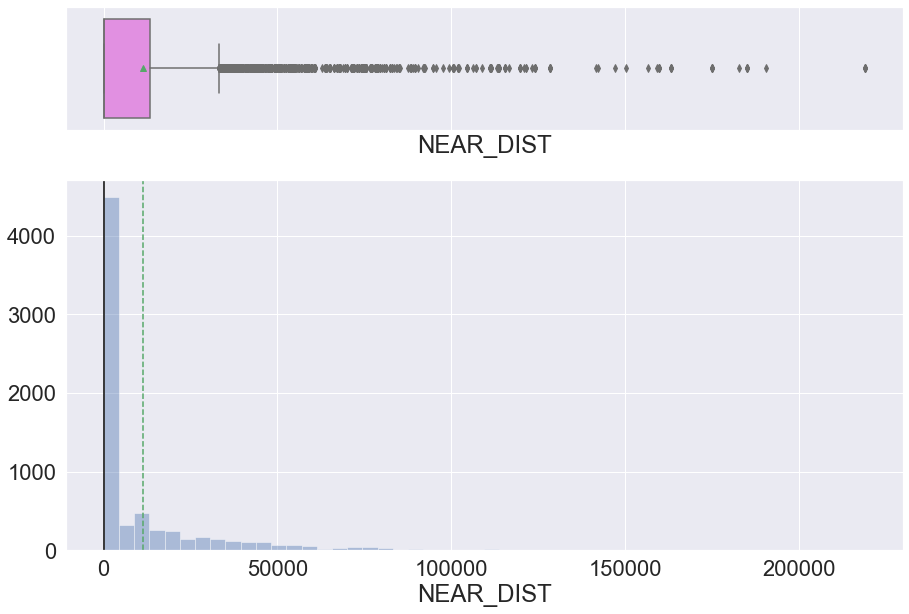

In [303]:
### Look at Near Distance as box plot, histogram
histogram_boxplot(dfnear['NEAR_DIST'])

In [304]:
## right skewed - bin data


bins = [-np.inf, 10560, 26400, np.inf]
dfnear['Dist_bins'] = pd.cut(dfnear['NEAR_DIST'], bins)


In [305]:
dfnear.Dist_bins.value_counts()

(-inf, 10560.0]       5008
(26400.0, inf]        1108
(10560.0, 26400.0]     927
Name: Dist_bins, dtype: int64

[None, None, None, None, None, None]

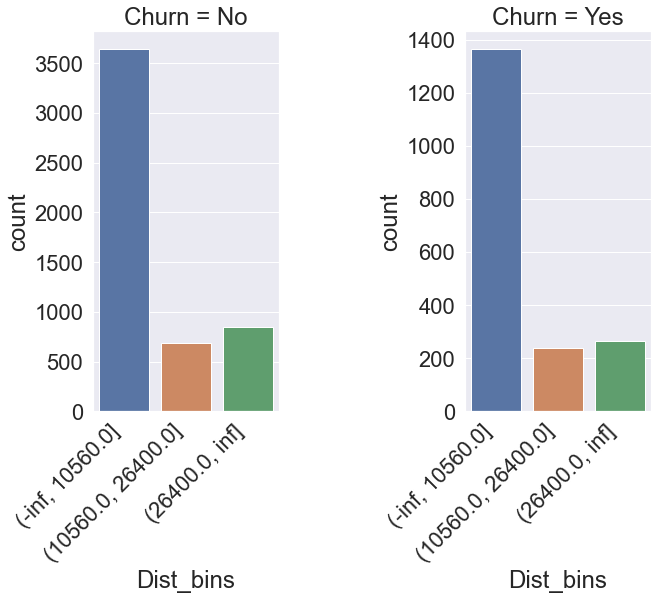

In [306]:
# Distance Bins

dfnear_yes = dfnear[dfnear['Churn_Value']==1]
dfnear_no = dfnear[dfnear['Churn_Value']==0]

fig, ax = plt.subplots(1,2)

fig.subplots_adjust(wspace=1)


sns.countplot(dfnear_no['Dist_bins'], ax=ax[0])
ax[0].set_title('Churn = No')
plt.setp(ax[0].get_xticklabels(), rotation=45, ha="right")

sns.countplot(dfnear_yes['Dist_bins'], ax=ax[1])
ax[1].set_title('Churn = Yes')
plt.setp(ax[1].get_xticklabels(), rotation=45, ha="right")

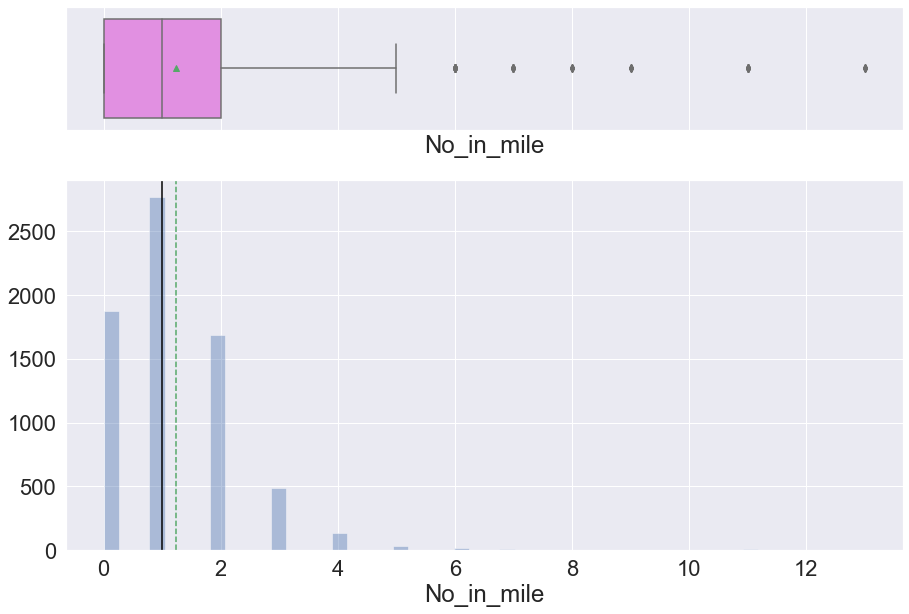

In [307]:
### No real difference - don't use in model
### Look at number of churned customers within 1 mile
### Look at Near Distance as box plot, histogram
histogram_boxplot(dfnear['No_in_mile'])

<AxesSubplot:xlabel='No_in_mile', ylabel='Churn_Label'>

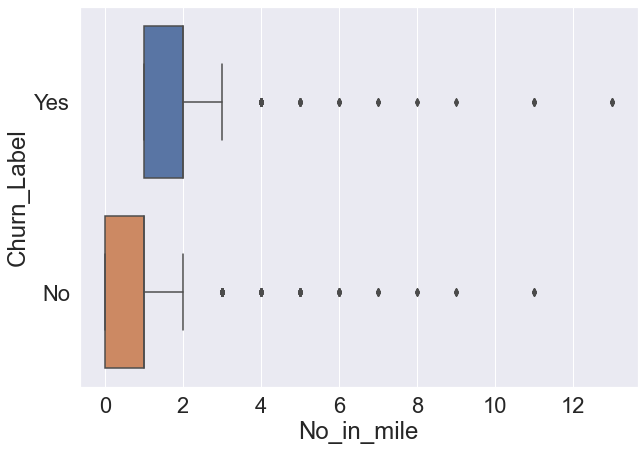

In [308]:
sns.boxplot(x= dfnear['No_in_mile'], y = dfnear['Churn_Label'])

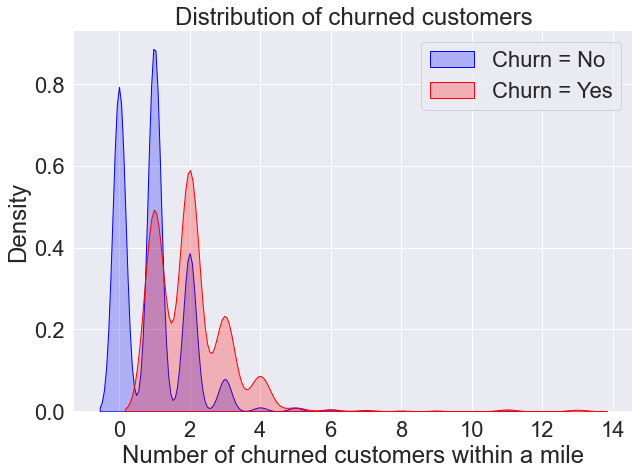

In [309]:
### plot above as kde plot - potentially use in presentation
ax = sns.kdeplot(dfnear.No_in_mile[(dfnear["Churn_Value"] == 0) ],
                color="Blue", shade = True)
ax = sns.kdeplot(dfnear.No_in_mile[(dfnear["Churn_Value"] == 1) ],
                ax =ax, color="Red", shade= True)
ax.legend(["Churn = No","Churn = Yes"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Number of churned customers within a mile')
ax.set_title('Distribution of churned customers')



In [310]:
### get column names to see what needs to be dropped
dfnear.columns

Index(['OBJECTID_1', 'OBJECTID', 'CustomerID', 'Count_', 'Country', 'State',
       'City', 'Zip_Code', 'Lat_Long', 'Lat_Long_X', 'Lat_Long_Y', 'Latitude',
       'Longitude', 'Gender', 'Senior_Citizen', 'Partner', 'Dependents',
       'Tenure_Months', 'Phone_Service', 'Multiple_Lines', 'Internet_Service',
       'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support',
       'Streaming_TV', 'Streaming_Movies', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charges', 'Total_Charges', 'Churn_Label',
       'Churn_Value', 'Churn_Score', 'CLTV', 'Churn_Reason', 'NEAR_FID',
       'NEAR_DIST', 'BUFF_DIST', 'No_in_mile', 'Shape_Length', 'Shape_Area',
       'Dist_bins'],
      dtype='object')

In [311]:
### drop location and churn fields that won't be used in maodel
dfnear = dfnear.drop(['OBJECTID_1','Count_','Churn_Label', 'Churn_Score','CustomerID','Churn_Reason','Zip_Code','Lat_Long','City', 'Country','State','Latitude', 'Longitude', 'Lat_Long_X', 'Lat_Long_Y', 'NEAR_FID', 'NEAR_DIST', 'Dist_bins', 'Shape_Length', 'Shape_Area'], axis=1)


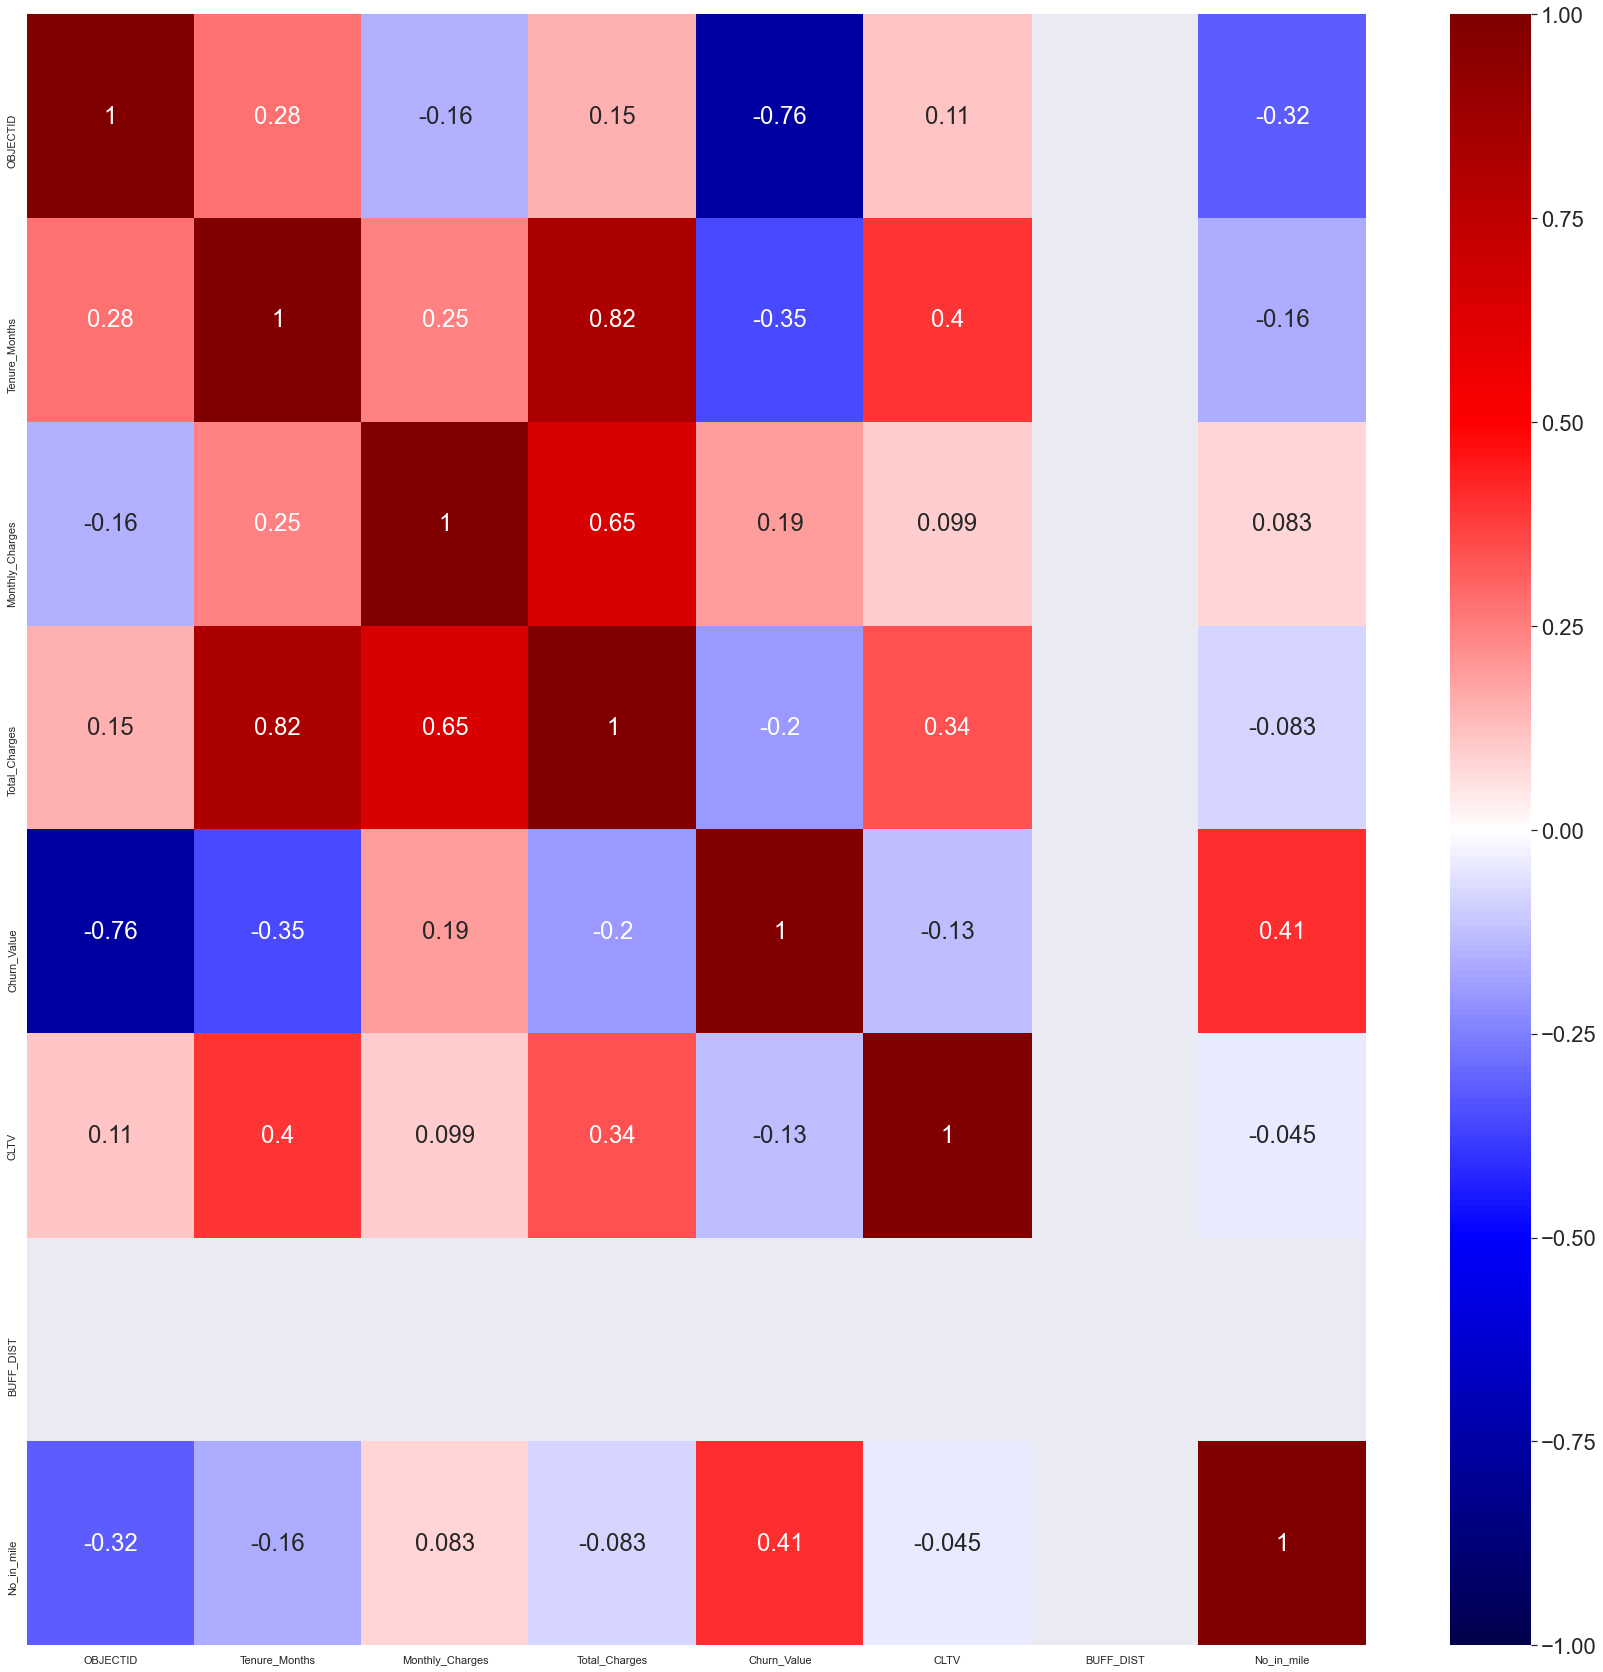

In [312]:
# heatmap to look at feature correlation and which need to be dropped
fig, ax = plt.subplots(figsize=(30,30))  
sns.set(font_scale=2)
sns.heatmap(dfnear.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

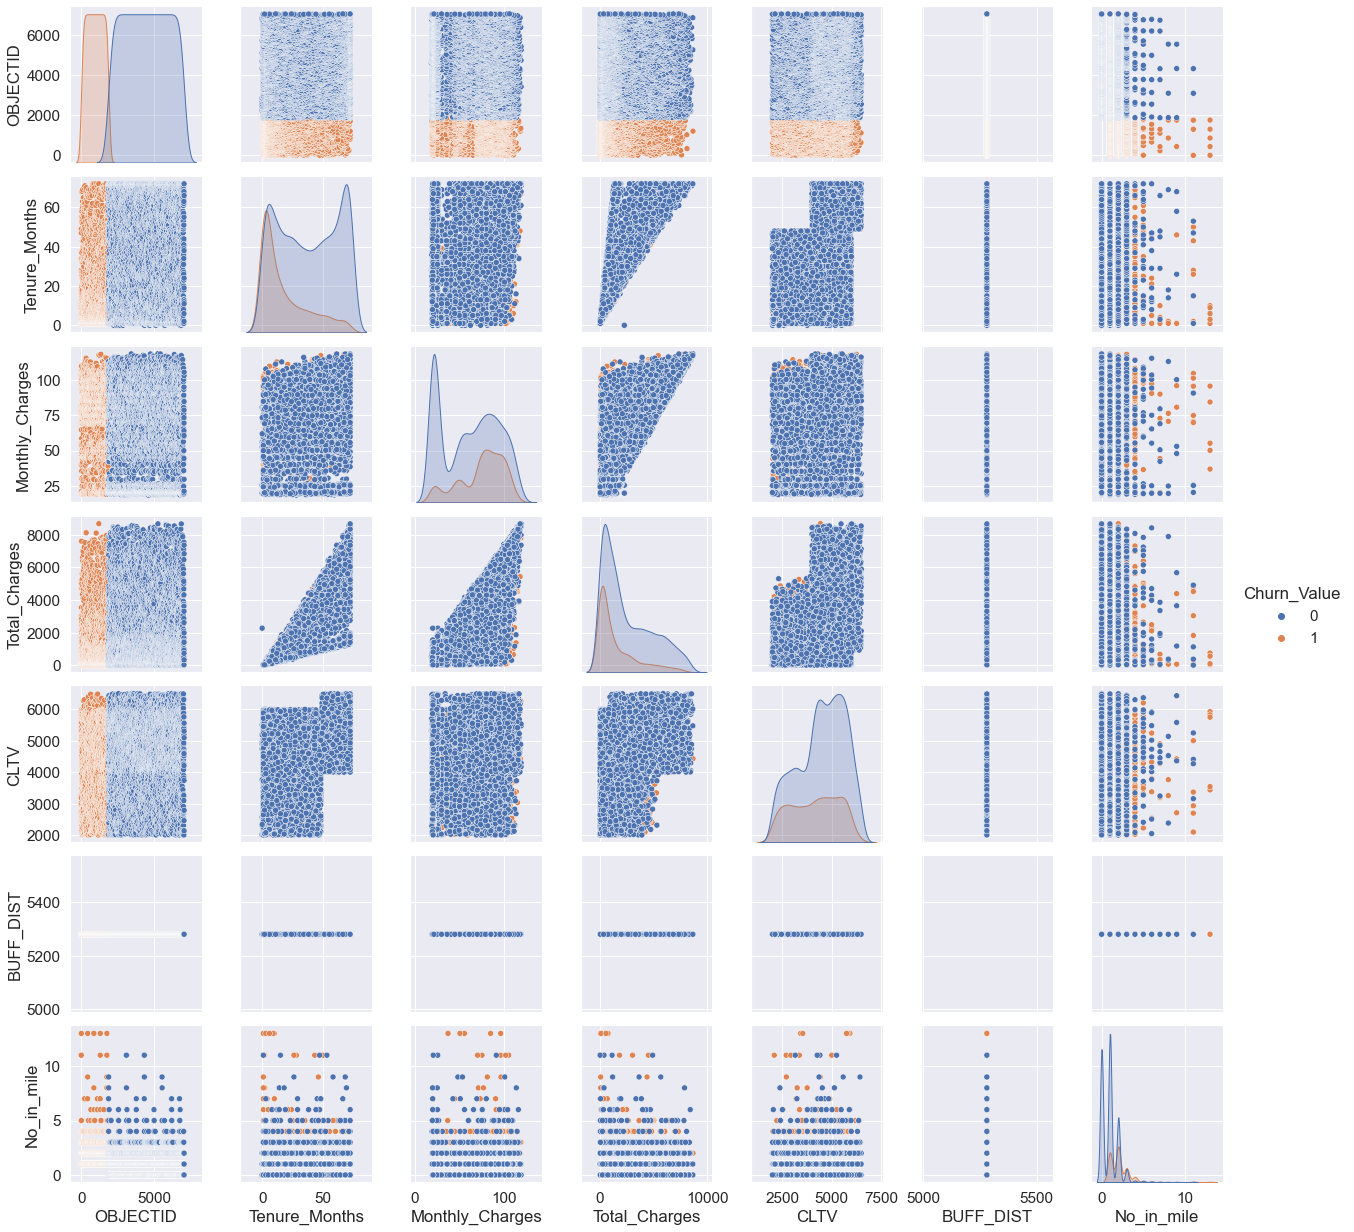

In [313]:

sns.set(font_scale=1.4)
sns.pairplot(dfnear, hue='Churn_Value');

#### Continue EDA

[None, None, None, None, None, None]

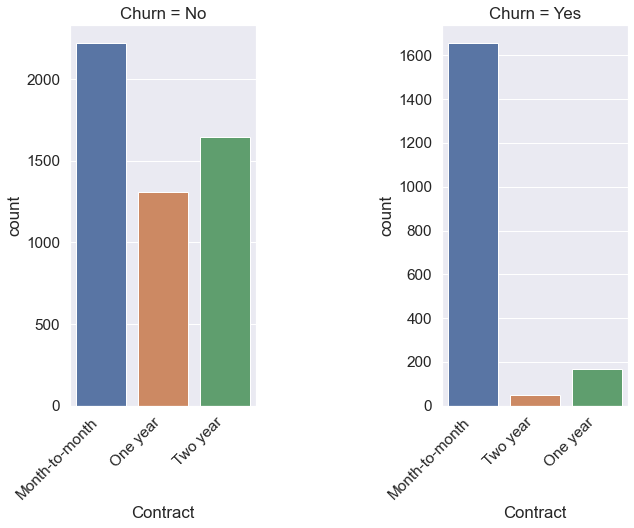

In [314]:
# Contract Type

dfnear_yes = dfnear[dfnear['Churn_Value']==1]
dfnear_no = dfnear[dfnear['Churn_Value']==0]

fig, ax = plt.subplots(1,2)

fig.subplots_adjust(wspace=1)


sns.countplot(dfnear_no['Contract'], ax=ax[0])
ax[0].set_title('Churn = No')
plt.setp(ax[0].get_xticklabels(), rotation=45, ha="right")

sns.countplot(dfnear_yes['Contract'], ax=ax[1])
ax[1].set_title('Churn = Yes')
plt.setp(ax[1].get_xticklabels(), rotation=45, ha="right")

[None, None, None, None, None, None]

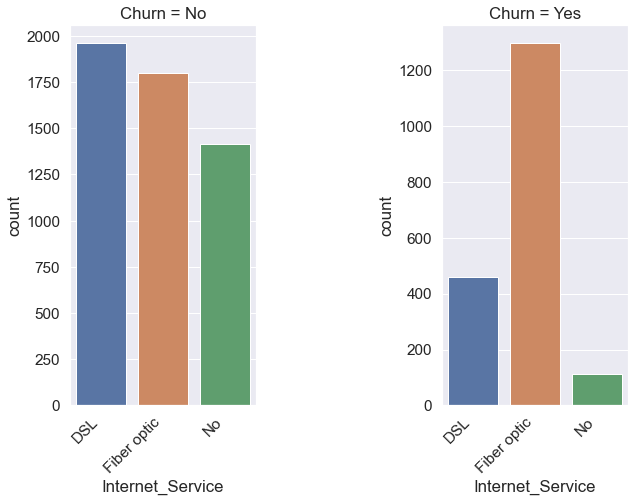

In [315]:
# Internet Service

dfnear_yes = dfnear[dfnear['Churn_Value']==1]
dfnear_no = dfnear[dfnear['Churn_Value']==0]

fig, ax = plt.subplots(1,2)

fig.subplots_adjust(wspace=1)


sns.countplot(dfnear_no['Internet_Service'], ax=ax[0])
ax[0].set_title('Churn = No')
plt.setp(ax[0].get_xticklabels(), rotation=45, ha="right")

sns.countplot(dfnear_yes['Internet_Service'], ax=ax[1])
ax[1].set_title('Churn = Yes')
plt.setp(ax[1].get_xticklabels(), rotation=45, ha="right")

In [316]:
dfnear.columns

Index(['OBJECTID', 'Gender', 'Senior_Citizen', 'Partner', 'Dependents',
       'Tenure_Months', 'Phone_Service', 'Multiple_Lines', 'Internet_Service',
       'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support',
       'Streaming_TV', 'Streaming_Movies', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charges', 'Total_Charges', 'Churn_Value',
       'CLTV', 'BUFF_DIST', 'No_in_mile'],
      dtype='object')

In [317]:
## drop remaining uneeded fields
dfnear_base = dfnear.drop(['BUFF_DIST', 'OBJECTID'], axis=1)

## Feature Engineering 2 combine redundant features
##### combine no internet service  and Internet service = No internet service into one feature
##### combine no phone serviceand Phone Service = No Phone Service  into one feature
##### combine Streaming no internet Service and Steaming = No internet service into one feature



In [318]:
dfnear_base['Multiple_Lines'] = dfnear_base['Multiple_Lines'].replace(['No phone service'],'No')
dfnear_base['Online_Security'] = dfnear_base['Online_Security'].replace(['No internet service'],'No')
dfnear_base['Online_Backup'] = dfnear_base['Online_Backup'].replace(['No internet service'],'No')
dfnear_base['Device_Protection'] = dfnear_base['Device_Protection'].replace(['No internet service'],'No')
dfnear_base['Tech_Support'] = dfnear_base['Tech_Support'].replace(['No internet service'],'No')
dfnear_base['Streaming_TV'] = dfnear_base['Streaming_TV'].replace(['No internet service'],'No')
dfnear_base['Streaming_Movies'] = dfnear_base['Streaming_Movies'].replace(['No internet service'],'No')

print(dfnear_base['Multiple_Lines'].unique())
print(dfnear_base['Internet_Service'].unique())
print(dfnear_base['Online_Security'].unique())
print(dfnear_base['Online_Backup'].unique())
print(dfnear_base['Device_Protection'].unique())
print(dfnear_base['Tech_Support'].unique())
print(dfnear_base['Streaming_TV'].unique())
print(dfnear_base['Streaming_Movies'].unique())


['No' 'Yes']
['DSL' 'Fiber optic' 'No']
['Yes' 'No']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']


In [319]:
#Create dummies for revised models
newbase1 = pd.get_dummies(data=dfnear_base, columns=['Gender', 'Senior_Citizen', 'Partner', 'Dependents', 'Phone_Service', 'Multiple_Lines', 'Internet_Service',
       'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support',
       'Streaming_TV', 'Streaming_Movies', 'Paperless_Billing',
       'Payment_Method'], drop_first=True)
newbase = pd.get_dummies(newbase1, columns = ['Contract'], drop_first=False)
newbase = newbase.drop('Contract_Two year', axis =1)


In [320]:
newbase.columns ### look at column names

Index(['Tenure_Months', 'Monthly_Charges', 'Total_Charges', 'Churn_Value',
       'CLTV', 'No_in_mile', 'Gender_Male', 'Senior_Citizen_Yes',
       'Partner_Yes', 'Dependents_Yes', 'Phone_Service_Yes',
       'Multiple_Lines_Yes', 'Internet_Service_Fiber optic',
       'Internet_Service_No', 'Online_Security_Yes', 'Online_Backup_Yes',
       'Device_Protection_Yes', 'Tech_Support_Yes', 'Streaming_TV_Yes',
       'Streaming_Movies_Yes', 'Paperless_Billing_Yes',
       'Payment_Method_Credit card (automatic)',
       'Payment_Method_Electronic check', 'Payment_Method_Mailed check',
       'Contract_Month-to-month', 'Contract_One year'],
      dtype='object')

In [321]:

### rerun cross validation models with new feature, combined features, and drop correlated Total Charges


newX = newbase.drop(['Churn_Value', 'Total_Charges'], axis=1)
newy = newbase['Churn_Value']

import imblearn.under_sampling ### use undersampling so don't lose any churn customer data


RUS = imblearn.under_sampling.RandomUnderSampler(random_state=42)# fit predictor and target variable
X_rus_n, y_rus_n = RUS.fit_resample(newX, newy)

### create train test split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


kf = KFold(n_splits=10, shuffle=True)

logreg = LogisticRegression()
classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
RFclassifier = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 0)
GBclassifier = GaussianNB()
log_reg_f1_n = cross_val_score(logreg, X_rus_n, y_rus_n , cv = kf, scoring = 'f1')
DT_f1_n = cross_val_score(classifier, X_rus_n, y_rus_n , cv = kf, scoring = 'f1')
RF_f1_n = cross_val_score(RFclassifier, X_rus_n, y_rus_n , cv = kf, scoring = 'f1')
GB_f1_n = cross_val_score(GBclassifier, X_rus_n, y_rus_n , cv = kf, scoring = 'f1')
log_reg_recall_n = cross_val_score(logreg, X_rus_n, y_rus_n , cv = kf, scoring = 'recall')
DT_recall_n = cross_val_score(classifier,X_rus_n, y_rus_n , cv = kf, scoring = 'recall')
RF_recall_n = cross_val_score(RFclassifier, X_rus_n, y_rus_n , cv = kf, scoring = 'recall')
GB_recall_n = cross_val_score(GBclassifier, X_rus_n, y_rus_n , cv = kf, scoring = 'recall')
log_reg_precision_n  = cross_val_score(logreg, X_rus_n, y_rus_n , cv = kf, scoring = 'precision')
DT_precision_n = cross_val_score(classifier,X_rus_n, y_rus_n , cv = kf, scoring = 'precision')
RF_precision_n = cross_val_score(RFclassifier, X_rus_n, y_rus_n , cv = kf, scoring = 'precision')
GB_precision_n = cross_val_score(GBclassifier, X_rus_n, y_rus_n , cv = kf, scoring = 'precision')

print ('Logistic Regression f1, recall, precision mean scores:', log_reg_f1_n.mean(), log_reg_recall_n.mean(), log_reg_precision_n.mean() )
print ('Decision Tree f1, recall, precision mean scores:', DT_f1_n.mean(), DT_recall_n.mean(), DT_precision_n.mean() )
print ('Random Forest f1, recall, precision mean scores:', RF_f1_n.mean(), RF_recall_n.mean(), RF_precision_n.mean())
print ('Naive Bayes f1, recall, precision mean scores:', GB_f1_n.mean(), GB_recall_n.mean(), GB_precision_n.mean() )


Logistic Regression f1, recall, precision mean scores: 0.8204015381473517 0.8337871383624377 0.8157208466641312
Decision Tree f1, recall, precision mean scores: 0.7690223757466692 0.7653313180540605 0.7867444523809721
Random Forest f1, recall, precision mean scores: 0.8425345871651395 0.8642529069633171 0.8218668377143477
Naive Bayes f1, recall, precision mean scores: 0.7820560051839756 0.7879510361859042 0.7763166551901828


In [322]:
### make as percentages
log_reg_f1_RUS_mn = int((cross_val_score(logreg, X_rus, y_rus, cv = kf, scoring = 'f1').mean())*100)
DT_f1_RUS_mn = int((cross_val_score(classifier,X_rus, y_rus, cv = kf, scoring = 'f1').mean())*100)
RF_f1_RUS_mn = int((cross_val_score(RFclassifier,X_rus, y_rus, cv = kf, scoring = 'f1').mean())*100)
GB_f1_RUS_mn = int((cross_val_score(GBclassifier,X_rus, y_rus, cv = kf, scoring = 'f1').mean())*100)
log_reg_recall_RUS_mn = int((cross_val_score(logreg,X_rus, y_rus, cv = kf, scoring = 'recall').mean())*100)
DT_recall_RUS_mn = int((cross_val_score(classifier,X_rus, y_rus, cv = kf, scoring = 'recall').mean())*100)
RF_recall_RUS_mn = int((cross_val_score(RFclassifier,X_rus, y_rus, cv = kf, scoring = 'recall').mean())*100)
GB_recall_RUS_mn = int((cross_val_score(GBclassifier,X_rus, y_rus, cv = kf, scoring = 'recall').mean())*100)
log_reg_precision_RUS_mn = int((cross_val_score(logreg,X_rus, y_rus, cv = kf, scoring = 'precision').mean())*100)
DT_precision_RUS_mn = int((cross_val_score(classifier,X_rus, y_rus, cv = kf, scoring = 'precision').mean())*100)
RF_precision_RUS_mn = int((cross_val_score(RFclassifier,X_rus, y_rus, cv = kf, scoring = 'precision').mean())*100)
GB_precision_RUS_mn = int((cross_val_score(GBclassifier,X_rus, y_rus, cv = kf, scoring = 'precision').mean())*100)

log_reg_f1_RUS_mn_n = int((cross_val_score(logreg, X_rus_n, y_rus_n, cv = kf, scoring = 'f1').mean())*100)
DT_f1_RUS_mn_n = int((cross_val_score(classifier,X_rus_n, y_rus_n, cv = kf, scoring = 'f1').mean())*100)
RF_f1_RUS_mn_n = int((cross_val_score(RFclassifier,X_rus_n, y_rus_n, cv = kf, scoring = 'f1').mean())*100)
GB_f1_RUS_mn_n = int((cross_val_score(GBclassifier,X_rus_n, y_rus_n, cv = kf, scoring = 'f1').mean())*100)
log_reg_recall_RUS_mn_n = int((cross_val_score(logreg,X_rus_n, y_rus_n, cv = kf, scoring = 'recall').mean())*100)
DT_recall_RUS_mn_n = int((cross_val_score(classifier,X_rus_n, y_rus_n, cv = kf, scoring = 'recall').mean())*100)
RF_recall_RUS_mn_n = int((cross_val_score(RFclassifier,X_rus_n, y_rus_n, cv = kf, scoring = 'recall').mean())*100)
GB_recall_RUS_mn_n = int((cross_val_score(GBclassifier,X_rus_n, y_rus_n, cv = kf, scoring = 'recall').mean())*100)
log_reg_precision_RUS_mn_n = int((cross_val_score(logreg,X_rus_n, y_rus_n, cv = kf, scoring = 'precision').mean())*100)
DT_precision_RUS_mn_n = int((cross_val_score(classifier,X_rus_n, y_rus_n, cv = kf, scoring = 'precision').mean())*100)
RF_precision_RUS_mn_n = int((cross_val_score(RFclassifier,X_rus_n, y_rus_n, cv = kf, scoring = 'precision').mean())*100)
GB_precision_RUS_mn_n = int((cross_val_score(GBclassifier,X_rus_n, y_rus_n, cv = kf, scoring = 'precision').mean())*100)



In [323]:
# Comparing performance of the original 4 models again so table is close to revised

performance = {'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes'], 
               'F1 Score (%)': [log_reg_f1_RUS_mn , DT_f1_RUS_mn, RF_f1_RUS_mn, GB_f1_RUS_mn], 
               'Recall (%)': [log_reg_recall_RUS_mn , DT_recall_RUS_mn, RF_recall_RUS_mn, GB_recall_RUS_mn] , 
               'Precision (%)': [log_reg_precision_RUS_mn , DT_precision_RUS_mn, RF_precision_RUS_mn, GB_precision_RUS_mn]
              }
perf = pd.DataFrame(data=performance)
perf

,Model,F1 Score (%),Recall (%),Precision (%)
0,Logistic Regression,76,79,75
1,Decision Tree,69,68,69
2,Random Forest,77,79,75
3,Naive Bayes,77,88,68


In [324]:
# Comparing performance of the revised 4 models

performance2 = {'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes'], 
               'F1 Score (%)': [log_reg_f1_RUS_mn_n , DT_f1_RUS_mn_n, RF_f1_RUS_mn_n, GB_f1_RUS_mn_n], 
               'Recall (%)': [log_reg_recall_RUS_mn_n , DT_recall_RUS_mn_n, RF_recall_RUS_mn_n, GB_recall_RUS_mn_n] , 
               'Precision (%)': [log_reg_precision_RUS_mn_n , DT_precision_RUS_mn_n, RF_precision_RUS_mn_n, GB_precision_RUS_mn_n]
              }
perf2 = pd.DataFrame(data=performance2)
perf2

,Model,F1 Score (%),Recall (%),Precision (%)
0,Logistic Regression,82,83,81
1,Decision Tree,77,77,78
2,Random Forest,84,86,82
3,Naive Bayes,78,78,77


In [325]:
### Feature importance for random classifier
model=RandomForestClassifier()
features=X_rus_n

model.fit(features, y_rus_n)

feature_importances=pd.DataFrame({'features':features.columns,'feature_importance':model.feature_importances_})
sorted_features = feature_importances.sort_values('feature_importance',ascending=False).head(10)


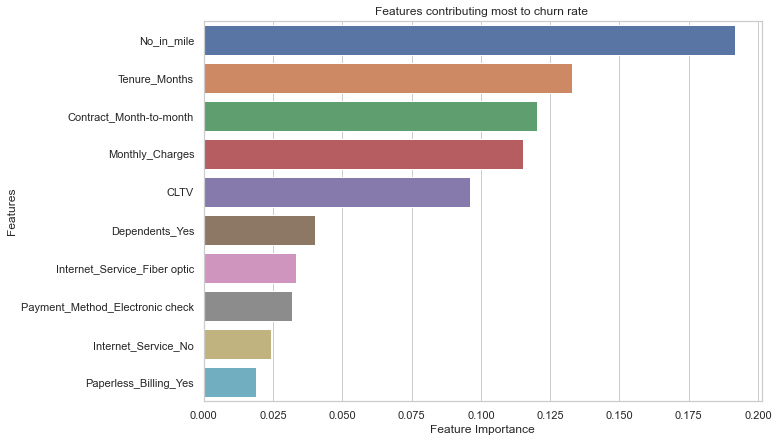

In [326]:
import seaborn as sns
sns.set_theme(style="whitegrid")


ax = sns.barplot(y="features", x="feature_importance", data=sorted_features)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Features contributing most to churn rate ") 
plt.show(fig)

### Ensemble models

####### ran ensemble models and did not see improvement
####### Chose ensemble because the most improvement from base was in the random forest model
####### Futre iterations could look at XGBoost.

In [327]:
X_ensemble = newbase.drop(['Churn_Value'], axis=1)
y_ensemble = newbase['Churn_Value']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_ensemble, y_ensemble, test_size = .2, random_state=42)

In [328]:
logreg = LogisticRegression()
RFclassifier = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 0)

model_list = [('logreg',logreg), 
('RandomForest', RFclassifier)]

for model in model_list:
    curr_name, curr_model = model
    curr_model.fit(X_train1, y_train1)
    curr_score = curr_model.score(X_test1,y_test1 )

from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=model_list, voting='hard', weights=None)

In [329]:
vc.fit(X_train1, y_train1)
y_pred_vc = vc.predict(X_test1)

In [330]:
from sklearn.metrics import classification_report
classify_vc = classification_report(y_test1, y_pred_vc)
print(classify_vc)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1009
           1       0.81      0.56      0.66       400

    accuracy                           0.84      1409
   macro avg       0.83      0.75      0.78      1409
weighted avg       0.83      0.84      0.83      1409



### Continue Exploratory Data Analysis and Data Visualization on important features to inform business recommendations

In [331]:
dfnear_base.columns

Index(['Gender', 'Senior_Citizen', 'Partner', 'Dependents', 'Tenure_Months',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service',
       'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support',
       'Streaming_TV', 'Streaming_Movies', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charges', 'Total_Charges', 'Churn_Value',
       'CLTV', 'No_in_mile'],
      dtype='object')

<AxesSubplot:xlabel='Phone_Service', ylabel='Monthly_Charges'>

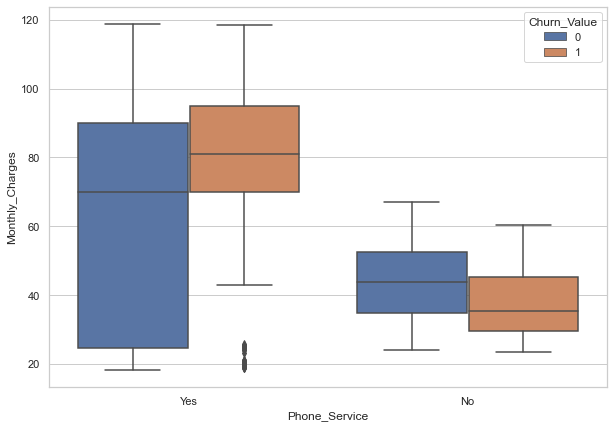

In [332]:
### Look at key services  - phone and internet service (top ten features) with Monthly charges (one of most important features)
sns.boxplot(x= dfnear_base['Phone_Service'], y = dftelco['Monthly_Charges'], hue = dfnear_base['Churn_Value'])
#### monthly charges higher for churned customers

<AxesSubplot:xlabel='Internet_Service', ylabel='Monthly_Charges'>

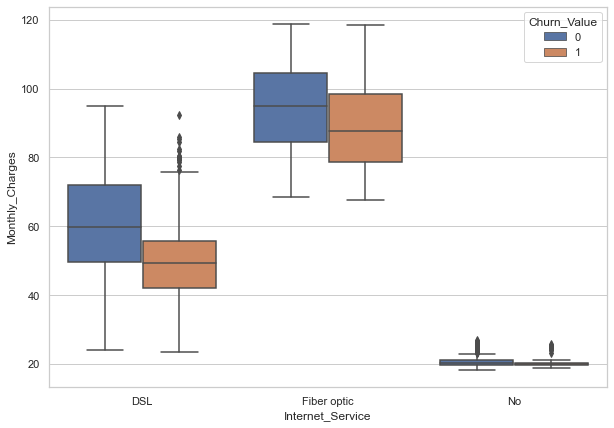

In [333]:
sns.boxplot(x= dfnear_base['Internet_Service'], y = dfnear_base['Monthly_Charges'], hue = dfnear_base['Churn_Value'])
### monthly charges for churned customers is lower BUT overall fiber optic services has high cost

In [334]:
dftelco['Internet_Service'].unique()


array(['DSL', 'Fiber optic', 'No'], dtype=object)

<AxesSubplot:xlabel='count', ylabel='Churn_Reason'>

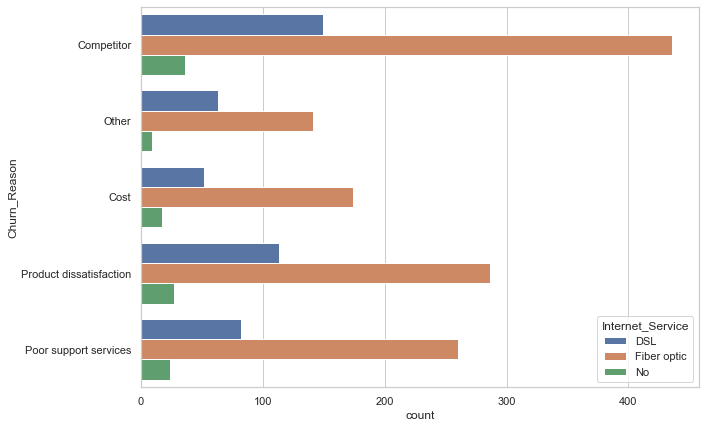

In [335]:
# look at churn reason to see why customers with internet services are leaving, Cost is important factor for fiber optic customers
dftelco_yes = dftelco[(dftelco['Churn_Value']==1)]
sns.countplot(y=dftelco_yes['Churn_Reason'],hue = dfnear_base['Internet_Service'])

[None, None, None, None, None, None, None, None, None, None]

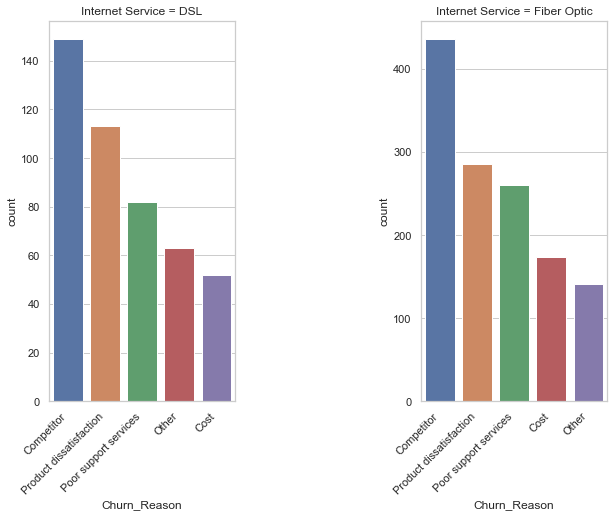

In [336]:
# Internet Service

dftelco_yes_DSL = dftelco[(dftelco['Churn_Value']==1) & (dftelco['Internet_Service']=='DSL')]
dftelco_yes_Fiber = dftelco[(dfnear['Churn_Value']==1) & (dftelco['Internet_Service']=='Fiber optic')]

fig, ax = plt.subplots(1,2)

fig.subplots_adjust(wspace=1)


sns.countplot(dftelco_yes_DSL['Churn_Reason'], ax=ax[0], order = dftelco_yes_DSL['Churn_Reason'].value_counts().index)
ax[0].set_title('Internet Service = DSL')
plt.setp(ax[0].get_xticklabels(), rotation=45, ha="right")


sns.countplot(dftelco_yes_Fiber['Churn_Reason'], ax=ax[1], order = dftelco_yes_Fiber['Churn_Reason'].value_counts().index)
ax[1].set_title('Internet Service = Fiber Optic')
plt.setp(ax[1].get_xticklabels(), rotation=45, ha="right")

In [337]:
### look at uniqe values for churned customers
dftelco.groupby('Churn_Reason').nunique()
#table.groupby('YEARMONTH').CLIENTCODE.nunique()

,CustomerID,Count,Country,State,City,Zip_Code,Lat_Long,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,Churn_Value,Churn_Score,CLTV
Churn_Reason,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Competitor,621,1,1,1,406,538,538,538,538,2,2,2,2,70,2,3,3,3,3,3,3,3,3,3,2,4,464,600,1,1,36,578
Cost,243,1,1,1,178,231,231,231,231,2,2,2,2,62,2,3,3,3,3,3,3,3,3,3,2,4,204,242,1,1,36,235
Other,213,1,1,1,165,201,201,201,201,2,2,2,2,54,2,3,3,3,3,3,3,3,3,3,2,4,194,212,1,1,36,204
Poor support services,366,1,1,1,283,346,346,346,346,2,2,2,2,67,2,3,3,3,3,3,3,3,3,3,2,4,300,357,1,1,36,352
Product dissatisfaction,426,1,1,1,289,386,386,386,386,2,2,2,2,67,2,3,3,3,3,3,3,3,3,3,2,4,347,418,1,1,36,403


<AxesSubplot:xlabel='Internet_Service', ylabel='No_in_mile'>

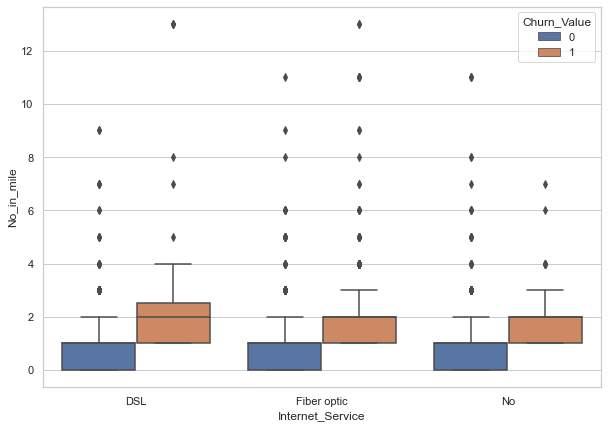

In [338]:
### are there differences in internet services for churn hotspots? 
sns.boxplot(x= dfnear_base['Internet_Service'], y = dfnear_base['No_in_mile'], hue = dfnear_base['Churn_Value'])

<AxesSubplot:xlabel='Phone_Service', ylabel='No_in_mile'>

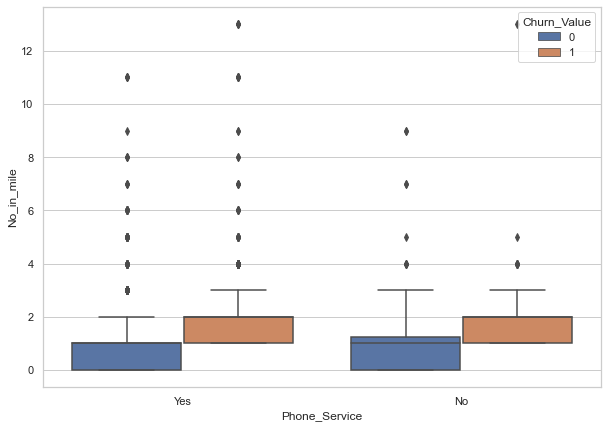

In [339]:
### are there differences in phone services for churn hotspots? 
sns.boxplot(x= dfnear_base['Phone_Service'], y = dfnear_base['No_in_mile'], hue = dfnear_base['Churn_Value'])

[None, None, None, None, None, None]

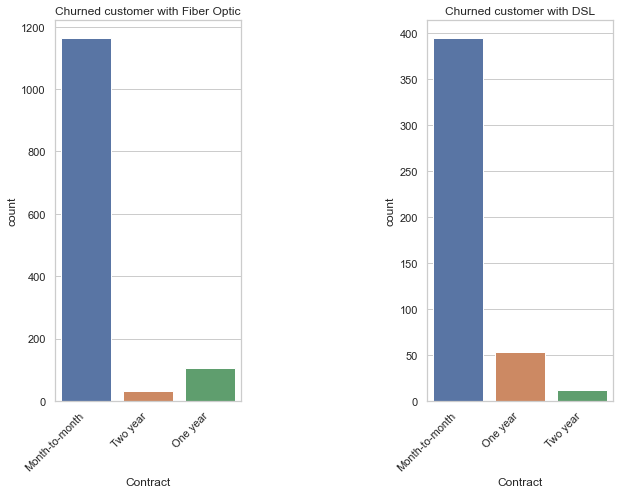

In [341]:
# Contract Type are there differences in contract types for internet services for churned 

dftelco_yes_DSL = dftelco[(dftelco['Churn_Value']==1) & (dftelco['Internet_Service']=='DSL')]
dftelco_yes_Fiber = dftelco[(dfnear['Churn_Value']==1) & (dftelco['Internet_Service']=='Fiber optic')]

fig, ax = plt.subplots(1,2)

fig.subplots_adjust(wspace=1)


sns.countplot(dftelco_yes_Fiber['Contract'], ax=ax[0])
ax[0].set_title('Churned customer with Fiber Optic')
plt.setp(ax[0].get_xticklabels(), rotation=45, ha="right")

sns.countplot(dftelco_yes_DSL['Contract'], ax=ax[1])
ax[1].set_title('Churned customer with DSL')
plt.setp(ax[1].get_xticklabels(), rotation=45, ha="right")

[None, None, None, None, None, None]

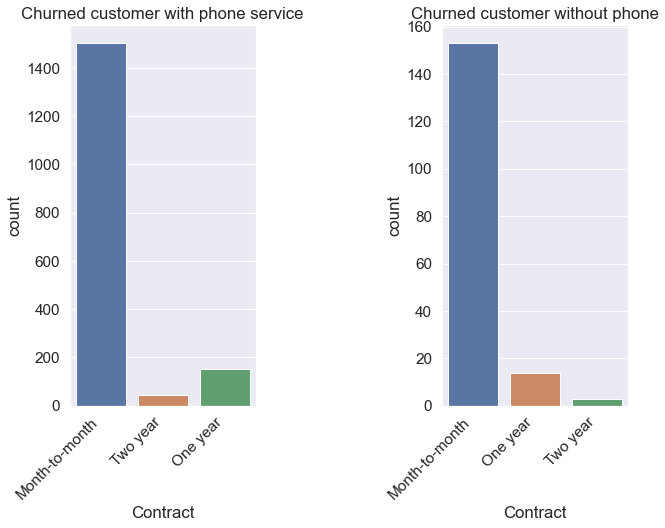

In [176]:
# Contract Type - are there differences in contract types for phone services for churned 

dftelco_yes_phone = dftelco[(dftelco['Churn_Value']==1) & (dftelco['Phone_Service']=='Yes')]
dftelco_yes_nophone= dftelco[(dfnear['Churn_Value']==1) & (dftelco['Phone_Service']=='No')]

fig, ax = plt.subplots(1,2)

fig.subplots_adjust(wspace=1)


sns.countplot(dftelco_yes_phone['Contract'], ax=ax[0])
ax[0].set_title('Churned customer with phone service')
plt.setp(ax[0].get_xticklabels(), rotation=45, ha="right")

sns.countplot(dftelco_yes_nophone['Contract'], ax=ax[1])
ax[1].set_title('Churned customer without phone')
plt.setp(ax[1].get_xticklabels(), rotation=45, ha="right")

[None, None, None, None, None, None, None, None, None, None]

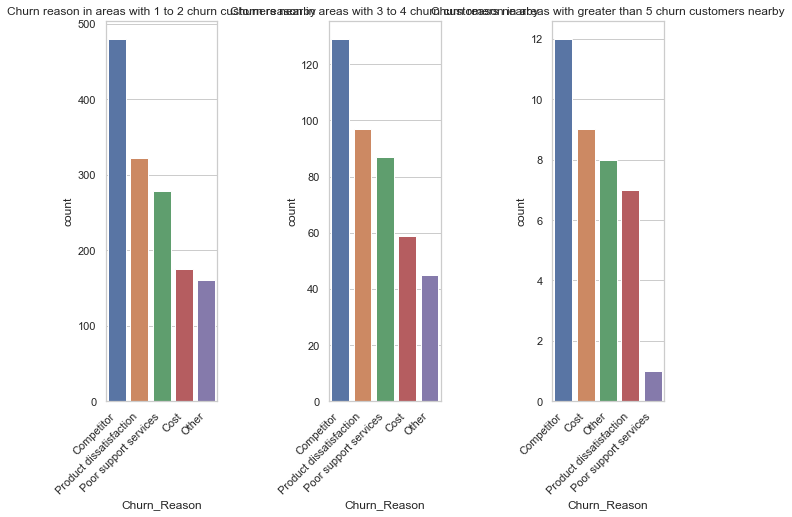

In [352]:
# Hotspots are there differences in why customers left in churned hotspots? 

dfnear_yes_1to2 = dfnear_copy[(dfnear_copy['Churn_Value']==1) & (dfnear_copy['No_in_mile']<=2)]
dfnear_yes_3to4 = dfnear_copy[(dfnear_copy['Churn_Value']==1) & (dfnear_copy['No_in_mile']>2) & (dfnear_copy['No_in_mile']<5)]
dfnear_yes_5to13 = dfnear_copy[(dfnear_copy['Churn_Value']==1) & (dfnear_copy['No_in_mile']>=5)]

fig, ax = plt.subplots(1,3)

fig.subplots_adjust(wspace=1)


sns.countplot(dfnear_yes_1to2['Churn_Reason'], ax=ax[0], order = dfnear_yes_1to2['Churn_Reason'].value_counts().index)
ax[0].set_title('Churn reason in areas with 1 to 2 churn customers nearby')
plt.setp(ax[0].get_xticklabels(), rotation=45, ha="right")


sns.countplot(dfnear_yes_3to4['Churn_Reason'], ax=ax[1], order = dfnear_yes_3to4['Churn_Reason'].value_counts().index)
ax[1].set_title('Churn reason in areas with 3 to 4 churn customers nearby')
plt.setp(ax[1].get_xticklabels(), rotation=45, ha="right")


sns.countplot(dfnear_yes_5to13['Churn_Reason'], ax=ax[2], order = dfnear_yes_5to13['Churn_Reason'].value_counts().index)
ax[2].set_title('Churn reason in areas with greater than 5 churn customers nearby')
plt.setp(ax[2].get_xticklabels(), rotation=45, ha="right")